In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import shutil, os
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

In [4]:
#path = "./025_Mixed_Bird_Train/"
path = "./Mixed_Bird/"

In [5]:
manual_df = pd.read_csv("mixed_bird_manual.csv")

In [11]:
# need to find the files that are skipped over in tweetynet
def annotations_skipped(df_1, df_2):
    new_df = pd.DataFrame()
    if df_1["MANUAL ID"] & ~df_2.isin(["MANUAL ID"]):
        new_df = df_1["MANUAL ID"]
        
    return new_df

In [12]:
def rename_with_only_species_name(df):
    name = df["MANUAL ID"].split(" ")
    species_name = name[0] + " " + name[1]
    df["MANUAL ID"] = species_name
    return df

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [13]:
# Example parameters for BirdNET
isolation_parameters_birdnet = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "min_conf" : 0.5,
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

# Example Parameters for Microfaune
# isolation_parameters = {
#      "model" : "microfaune",
#      "technique" : "steinberg",
#      "threshold_type" : "median",
#      "threshold_const" : 2.0,
#      "threshold_min" : 0.0,
#      "window_size" : 2.0,
#      "chunk_size" : 5.0
# }

# Example parameters for TweetyNET
isolation_parameters_tweety = {
    "model" : "tweetynet",
    "tweety_output": True,
   "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
}

# TweetyNet to BirdNET Pipeline

In [14]:
automated_df_tweety = generate_automated_labels(path,isolation_parameters_tweety)
automated_chunked_df = annotation_chunker(automated_df_tweety, 3)

In [15]:
automated_chunked_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.047982,0,0.0,3.0,44100,bird,0.920045
1,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.047982,0,3.0,3.0,44100,bird,0.880960
2,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.047982,0,6.0,3.0,44100,bird,0.344129
3,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.047982,0,9.0,3.0,44100,bird,0.742972
4,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.047982,0,12.0,3.0,44100,bird,0.357025
...,...,...,...,...,...,...,...,...,...
1355,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.511995,0,21.0,3.0,44100,bird,0.622340
1356,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.511995,0,24.0,3.0,44100,bird,0.655067
1357,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.511995,0,27.0,3.0,44100,bird,0.655067
1358,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.511995,0,30.0,3.0,44100,bird,0.525011


In [26]:
manual_chunked_df = annotation_chunker(manual_df, 3)
manual_chunked_df['CONFIDENCE'] = 1
manual_chunked_df = manual_chunked_df.apply(rename_with_only_species_name,axis=1)

In [27]:
manual_chunked_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./TEST/,Aburria-aburri-257423.wav,24.6335,0,0.0,3.0,44100,Aburria aburri,1
1,./TEST/,Aburria-aburri-257423.wav,24.6335,0,3.0,3.0,44100,Aburria aburri,1
2,./TEST/,Aburria-aburri-257423.wav,24.6335,0,6.0,3.0,44100,Aburria aburri,1
3,./TEST/,Aburria-aburri-257423.wav,24.6335,0,18.0,3.0,44100,Aburria aburri,1
4,./TEST/,Aburria-aburri-257423.wav,24.6335,0,21.0,3.0,44100,Aburria aburri,1
...,...,...,...,...,...,...,...,...,...
22019,./TEST/,Zonotrichia-capensis-377483.wav,18.2596,0,0.0,3.0,44100,Zonotrichia capensis,1
22020,./TEST/,Zonotrichia-capensis-377483.wav,18.2596,0,3.0,3.0,44100,Zonotrichia capensis,1
22021,./TEST/,Zonotrichia-capensis-377483.wav,18.2596,0,6.0,3.0,44100,Zonotrichia capensis,1
22022,./TEST/,Zonotrichia-capensis-377483.wav,18.2596,0,12.0,3.0,44100,Zonotrichia capensis,1


In [28]:
multi_df = generate_automated_labels(path,isolation_parameters_birdnet, pregenerated_df=automated_chunked_df)

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE!

READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 39 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.4 SECONDS
DONE! WROTE 39 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 34 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO 

In [29]:
multi_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.048,0,0.0,3.0,48000,Thripadectes melanorhynchus,0.997751
1,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.048,0,3.0,3.0,48000,Thripadectes melanorhynchus,0.999836
2,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.048,0,6.0,3.0,48000,Pachyramphus homochrous,0.043848
3,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.048,0,9.0,3.0,48000,Thripadectes melanorhynchus,0.998313
4,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,33.048,0,12.0,3.0,48000,Epimachus fastosus,0.020381
...,...,...,...,...,...,...,...,...,...
1355,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.512,0,21.0,3.0,48000,Psittacara wagleri,0.084168
1356,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.512,0,24.0,3.0,48000,Psittacara strenuus,0.185709
1357,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.512,0,27.0,3.0,48000,Psittacara leucophthalmus,0.143050
1358,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,37.512,0,30.0,3.0,48000,Psittacara wagleri,0.351744


## TweetyNet Pipeline

In [30]:
# tweetyNet lable changed
automated_df_tweety["MANUAL ID"] = automated_df_tweety["IN FILE"].apply(lambda x: " ".join(x.split("-")[:2]))
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE,FILEPATH
0,0.488372,1.511628,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,0,33.047982,44100,Thripadectes melanorhynchus,0.920045,./Mixed_Bird/Thripadectes-melanorhynchus-10266...
1,3.837209,1.930233,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,0,33.047982,44100,Thripadectes melanorhynchus,0.880960,./Mixed_Bird/Thripadectes-melanorhynchus-10266...
2,6.046512,0.046512,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,0,33.047982,44100,Thripadectes melanorhynchus,0.344129,./Mixed_Bird/Thripadectes-melanorhynchus-10266...
3,9.511628,0.837209,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,0,33.047982,44100,Thripadectes melanorhynchus,0.671922,./Mixed_Bird/Thripadectes-melanorhynchus-10266...
4,10.348837,0.372093,./Mixed_Bird/,Thripadectes-melanorhynchus-102669.wav,0,33.047982,44100,Thripadectes melanorhynchus,0.742972,./Mixed_Bird/Thripadectes-melanorhynchus-10266...
...,...,...,...,...,...,...,...,...,...,...
2142,30.395349,1.232558,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,0,37.511995,44100,Psittacara leucophthalmus,0.525011,./Mixed_Bird/Psittacara-leucophthalmus-219004.wav
2143,34.976744,0.116279,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,0,37.511995,44100,Psittacara leucophthalmus,0.125777,./Mixed_Bird/Psittacara-leucophthalmus-219004.wav
2144,35.209302,0.232558,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,0,37.511995,44100,Psittacara leucophthalmus,0.423911,./Mixed_Bird/Psittacara-leucophthalmus-219004.wav
2145,35.581395,0.325581,./Mixed_Bird/,Psittacara-leucophthalmus-219004.wav,0,37.511995,44100,Psittacara leucophthalmus,0.246160,./Mixed_Bird/Psittacara-leucophthalmus-219004.wav


# ROC CURVES for Pipelines

### ROC Curves for Tweety to BirdNET

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.76501471 0.88590324 0.         0.89137179 0.14806335
 0.         0.80561519 0.48670495 0.4989807  0.03880388 0.90724015
 0.         0.75200742 0.56059623 0.         0.63359678 0.87208998
 0.37402162]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 59
confidence 59
automated df 59
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
[0.         0.92361689 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.58892268 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04332038 0.31518343
 0.63047707 0.30132818 0.72266322 0.         0.         0.12119458
 0.         0.25459853 0.45915714 0.         0.95315725 0.76259613
 0.46220875 0.         0.         0.07014465 0.42197517]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.82332104 0.         0.72533834 0.         0.         0.
 0.81942087 0.         0.         0.84730196 0.         0.2093664
 0.         0.         0.         0.         0.         0.
 0.         0.59059501 0.26088929 0.         0.         0.
 0.         0.         0.45546144 0.09748877 0.07743394 0.        ]
target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.93712395 0.97357053 0.         0.         0.         0.78925663
 0.94033295 0.90632981 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.81657189]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1.]
[0.         0.90353787 0.70764661 0.62695312 0.73139405 0.56201667
 0.88376164 0.79523551 0.61924148 0.29692498 0.90923721 0.17761755
 0.56113458 0.38649765 0.88473576 0.         0.13581799 0.25861168
 0.30272931 0.         0.         0.         0.         0.
 0.         0.         0.23535407 0.         0.         0.
 0.         0.84206653]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1.]
[0.99057466 0.         0.98001808 0.         0.96079522 0.07228868
 0.99294829 0.22420321 0.97640073 0.         0.98707926 0.
 0.98594493 0.         0.98025686 0.98919386 0.40637821 0.98752731
 0.         0.9705795  0.         0.97692275 0.         0.91103441
 0.         0.98135477 0.         0.95198357 0.         0.92681611]
target 16
confidence 16
automated df 16
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
[0.45543376 0.86170018 0.         0.         0.         0.79414827
 0.93240511 0.         0.         0.62659276 0.55918574 0.
 0.         0.         0.11575452 0.83925945]
target 34
confidence 34
automated df 34
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.25063434 0.9846437  0.99952161 0.98802209 0.99041092
 0.99722075 0.84048992 0.98707271 0.98052716 0.99683857 0.
 0.997

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99916422 0.98791599 0.         0.99545836 0.99776924 0.99837995
 0.         0.99709082 0.         0.99340904 0.99788827 0.75230289
 0.98877585 0.95439684 0.         0.99624026 0.97687006 0.
 0.99435729 0.99884003 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0.88890564 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
target 8
confidence 8
automated df 8
[0. 1. 0. 1. 0. 1. 0. 0.]
[0.         0.11084307 0.         0.42365277 0.         0.
 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
[1. 1. 1. 1. 1. 1. 0. 0.]
[0.980205   0.         0.79489076 0.98968643 0.93628299 0.97443807
 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.         0.         0.16637641 0.36739105 0.
 0.         0.         0.         0.         0.13936906 0.
 0.72143894 0.22548334 0.         0.         0.        ]
target 12
confidence 12
automated df 12
[1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.99564028 0.         0.         0.         0.99876899 0.
 0.         0.         0.         0.         0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 48
confidence 48
automated df 48
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.9905776  0.9785795  0.6725377  0.9541361  0.9987978  0.9938356
 0.9760498  0.99301696 0.99856216 0.939682   0.9357661  0.91832143
 0.9708991  0.9944719  0.9988826  0.9991153  0.98813325 0.9996482
 0.99513274 0.9991886  0.9979431  0.9984646  0.9953277  0.9995017
 0.99711037 0.9972474  0.9972     0.9969086  0.99922097 0.98413205
 0.99686193 0.9987325  0.99782723 0.9996964  0.99846905 0.9844685
 0.95421857 0.9974751  0.93333805 0.9987231  0.99634224 0.9904253
 0.9914767  0.99801445 0.9875853  0.98815143 0.9963999  0.9766282 ]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 65
confidence 65
automated df 65
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.76911741 0.8907907  0.         0.         0.79039782 0.93570191
 0.79956102 0.         0.         0.         0.96145582 0.88835824
 0.47619286 0.         0.         0.         0.90738034 0.75034511
 0.59340137 0.         0.         0.         0.         0.93583834
 0.89008361 0.95736223 0.         0.         0.         0.
 0.         0.         0.86172044 0.89755058 0.9891482  0.98602319
 0.7848525  0.         0.9642477  0.9891479  0.99507362 0.68864685
 0.         0.99434519 0.99707854 0.         0.         0.99413007
 0.99739778 0.         0.98899251 0.99693644 0.7026183  0.92535716
 0.97072101 0.         0.         0.75111628 0.7812317  0.99784744
 0.         0.         0.         0.97575426 0.97885293]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[0.79356891 0.76848292 0.88903964 0.85491836 0.45670021 0.57207084
 0.08050104 0.6233288  0.         0.72308052 0.76253277 0.
 0.90958792 0.98447704 0.         0.94560897 0.97210807 0.
 0.9155758 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1.]
[0.74388129 0.72597331 0.         0.         0.         0.
 0.         0.65607101 0.         0.91624945 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.35985681 0.19357373 0.33697569 0.
 0.         0.90735877]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
[0.95186079 0.         0.44808528 0.         0.70723176 0.
 0.         0.11177676 0.86609447 0.         0.61907393 0.98478067
 0.         0.         0.         0.         0.65771705 0.72446352
 0.6792509 ]
target 7
confidence 7
automated df 7
[1. 1. 1. 0. 1. 1. 1.]
[0.         0.6858927  0.         0.         0.         0.39331609
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
[0.99687946 0.         0.         0.         0.90775847 0.99462789
 0.         0.         0.99740618 0.99679875 0.99257255 0.
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 66
confidence 66
automated df 66
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
[0.93991703 0.         0.         0.         0.77348548 0.
 0.         0.         0.         0.52740818 0.         0.
 0.         0.         0.         0.91333985 0.         0.16740175
 0.43232608 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.64590961 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1849712
 0.         0.         0.         0.         0.64957863 0.
 0.         0.         0.         0.         0.         0.
 0.3009854  0.62793261 0.         0.         0.         0.63642484]
target 41
confidence 41
automated df 41
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1.]
[0.         0.87384373 0.         0.69441003 0.         0.92697811
 0.         0.7425313  0.         0.7962926  0.         0.88562739
 0.75523317 0.97735345 0.         0.99048549 0.         0.
 0.96986556 0.         0.80629092 0.         0.         0.98667347
 0.         0.95270324 0.92711949 0.         0.97634274 0.10360099
 0.         0.98453343]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 55
confidence 55
automated df 55
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.10613813 0.         0.18582776 0.         0.97590762
 0.         0.29895282 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.62481886 0.08324851
 0.         0.         0.78371954 0.63438052 0.03592201 0.76521295
 0.         0.92659169 0.27434137 0.91402811 0.53393412 0.
 0.97899044 0.         0.0621585  0.02192725 0.20398371 0.07838392
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0.9215737  0.91128045 0.         0.77175957 0.85827738 0.56994444
 0.86947501 0.         0.         0.         0.05980287 0.
 0.         0.         0.         0.         0.1430499  0.
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 67
confidence 67
automated df 67
[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0.93501544 0.98741955 0.         0.         0.         0.96942353
 0.99966657 0.88198704 0.99825376 0.99956805 0.61171037 0.
 0.         0.         0.         0.         0.         0.
 0.         0.99497885 0.96216977 0.49250343 0.         0.
 0.86493969 0.99571878 0.99961948 0.99673283 0.         0.
 0.99945647 0.97949481 0.99065477 0.96153992 0.99898154 0.08916607
 0.         0.         0.         0.         0.71573853 0.9986921
 0.99843031 0.98844355 0.96920913 0.         0.         0.
 0.         0.99643022 0.99698144 0.98453701 0.98942751 0.97329235
 0.         0.90893435 0.92424303 0.         0.         0.
 0.         0.         0.         0.99055076 0.73837775 0.9063074
 0.99256998]
target 29
confidence 29
automated df 29
[1. 1. 1. 1. 1.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0.]
[0.88258058 0.43831694 0.         0.         0.77141309 0.85587978
 0.         0.61588937 0.21745305 0.         0.93663377 0.
 0.         0.10530332 0.89788133 0.         0.88739133 0.96548057
 0.         0.76508605 0.         0.         0.         0.93980455
 0.91957021 0.         0.         0.92272019 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
[0.94829434 0.23261121 0.         0.         0.         0.
 0.67108542 0.92437387 0.         0.         0.         0.68535453
 0.97363245 0.         0.         0.         0.         0.90014136
 0.93841416]
target 52
confidence 52
automated df 52
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.9834067  0.9925787  0.97085154 0.9934076  0.99172616 0.98707426
 0.99669063 0.9966365  0.9865324  0.9907007  0.99595875 0.94700295
 0.97772455 0.99417853 0.98856676 0.9651477  0.996637   0.9962853
 0.9809542  0.9979663  0.9834064  0.9847039  0.9922341  0.9109517
 0.99337935 0.99660814 0.99486476 0.9946682  0.8510014  0.9904259
 0.14749782 0.99486005 0.99826163 0.9906536  0.99677175 0.99194676
 0.9894349  0.98316836 0.9949303  0.9595371  0.9756353  0.976659
 0.9948521  0.99385464 0.984118

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is tryi

target 16
confidence 16
automated df 16
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99763143 0.970355   0.9751761  0.8688831  0.9506929  0.98970747
 0.96980715 0.96634233 0.9765063  0.9641315  0.98745584 0.99836403
 0.97986495 0.9628388  0.98893166 0.9899762 ]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.9679414  0.96809131 0.92754436 0.         0.99498391 0.99827313
 0.         0.         0.99699497 0.         0.         0.97285163
 0.24876915 0.84460813 0.88336861 0.78520274 0.         0.71441025
 0.        ]
target 34
confidence 34
automated df 34
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.99672228 0.85341513 0.9867909  0.         0.         0.90519512
 0.99021238 0.         0.         0.94387609 0.92402983 0.
 0.97481298 0.         0.99090427 0.         0.98210955 0.
 0.98893356 0.90729475 0.08470501 0.9427458  0.99861383 0.60105342
 0.58235484 0.      

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0.91394144 0.         0.98638594 0.90420848 0.99498415 0.81625021
 0.93734145 0.         0.98244929 0.99819297 0.         0.
 0.         0.         0.         0.80068552 0.55344141 0.
 0.17038848 0.         0.         0.53999442 0.26522735 0.70448881
 0.         0.65982789 0.25149912 0.97370356 0.2367941  0.2238978
 0.76647055 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
[1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0.]
[0.80153185 0.85930014 0.         0.         0.         0.
 0.         0.95613909 0.96404016 0.94459563 0.         0.
 0.         0.         0.69683504 0.68360007 0.05536029 0.
 0.         0.         0.         0.33053675 0.98877025 0.99275923
 0.        ]
target 14
confidence 14
automated df 14
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0.74993569 0.         0.         0.92719793 0.         0.91875762
 0.         0.         0.         0.45083824 0.         0.
 0.82715619 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0.         0.63794827 0.         0.         0.         0.8577556
 0.         0.         0.66009837 0.82656354 0.98953044 0.03295759
 0.9859035  0.         0.         0.97178358 0.        ]
target 7
confidence 7
automated df 7
[1. 1. 0. 0. 0. 0. 1.]
[0.56428277 0.68679196 0.         0.         0.         0.
 0.59436971]
target 8
confidence 8
automated df 8
[1. 1. 0. 0. 0. 0. 1. 1.]
[0.99820769 0.49773979 0.         0.         0.         0.
 0.99202031 0.99554944]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.8416626  0.9161429  0.9576943  0.87871116 0.9181192  0.8769869
 0.9033952  0.93583107 0.9021097 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

target 22
confidence 22
automated df 22
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.97042972 0.91619241 0.31912634 0.         0.         0.09071714
 0.86692828 0.85095412 0.         0.95976359 0.92516357 0.
 0.86661178 0.97584212 0.29719934 0.         0.94081187 0.96352905
 0.         0.98455596 0.96120435 0.96447909]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
[0.50569439 0.72494346 0.         0.         0.88353765 0.
 0.         0.         0.         0.72445172 0.         0.
 0.         0.         0.         0.50231439 0.         0.47506434
 0.         0.         0.         0.58203316]
target 50
confidence 50
automated df 50
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1.]
[0.         0.50225502 0.         0.         0.         0.47982693
 0.48679218 0.99221146 0.98655695 0.         0.         0.
 0.95724785 0.95102441 0.         0.         0.         0.
 0.         0.98886395 0.99669421 0.99511802 0.99209481 0.
 0.         0.95670998 0.9978236  0.99303597 0.         0.
 0.         0.         0.99870384 0.99250984 0.         0.
 0.         0.99590212 0.9887771  0.         0.         0.
 0.         0.99853098 0.98824662 0.         0

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0.99775118 0.99983585 0.         0.99831259 0.         0.99982637
 0.99958032 0.99984241 0.         0.99933261 0.99940479 0.99118
 0.         0.99055266 0.         0.99913883 0.         0.
 0.        ]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99520481 0.99136955 0.99698347 0.99366635 0.46366918 0.97579342
 0.98986608 0.96118242 0.39387071 0.68031228 0.04677226 0.57936871
 0.         0.57465106 0.24837181 0.49186674 0.75294298 0.91438347
 0.27312857]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1.]
[0.         0.1925222  0.         0.         0.72229332 0.
 0.22549491 0.         0.         0.         0.49304128 0.
 0.         0.         0.         0.37174925 0.         0.
 0.56101185 0.         0.         0.         0.         0.
 0.448603   0.         0.72512895 0.09092595 0.         0.
 0.         0.         0.         0.33140826 0.         0.
 0.         0.         0.44837928 0.         0.47012258 0.06777505
 0.         0.         0.50386471 0.         0.         0.64087242
 0.67491895 0.         0.         0.         0.5713104  0.46970999]


0.8214285714285714

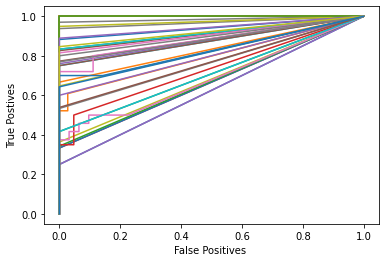

In [32]:
generate_ROC_curves_mutliclass(multi_df, manual_chunked_df)

### ROC Curves for TweetyNET pipeline

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.96161896 0.78991277 1.         1.         0.84866364 0.54670074
 0.75931112 0.86109182 0.89268959 0.98746391 0.67029172 0.75779247
 0.65180881 1.         0.74802346 0.74802346 0.4657128  0.58993334
 0.89373307]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 59
confidence 59
automated df 59
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
[0.         1.         0.         0.         0.         0.75774506
 0.27185146 0.88099429 0.         0.         0.         0.
 0.15048184 0.         0.         0.35343224 0.         0.23926976
 0.         0.         0.         0.16718011 0.79295344 0.79295344
 0.         0.         0.33392564 0.         0.24060281 0.
 0.19799531 0.         0.         0.2974189  0.         0.23729317
 0.27933746 0.         0.30966935 0.33209562 0.82053944 0.79063172
 1.         0.91644046 0.90782311 0.         0.         0.23919473
 0.22283916 0.81593766 0.81593766 0.         0.75875986 0.8566931
 0.8566931  0.         0.45426085 0.54562908 0.46418149]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.72908656 0.         0.92345881 0.7702324  0.         0.
 0.9514001  0.9514001  0.         0.87670744 0.72087085 0.72087085
 0.90195702 0.90195702 0.80419891 0.81992428 0.         0.90039995
 0.         1.         1.         0.84883652 0.84883652 1.
 1.         0.90433576 0.79241185 0.79241185 0.86618873 0.89959145]
target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.84516613 0.91359333 0.         0.         0.         1.
 1.         0.90421482 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.79133275]
target 32
confidence 32
automated df 32
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1.]
[0.         0.95511553 0.95511553 0.95511553 0.95511553 0.89671549
 0.89671549 0.97240124 0.97240124 0.9985106  0.90822

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1.]
[0.88709538 0.         0.89951439 0.94424444 0.94424444 1.
 1.         0.93760264 0.93760264 0.         0.89438392 0.
 0.90020179 0.         0.84750874 0.84750874 0.91409178 0.91409178
 0.92460768 0.92460768 0.         0.8423815  0.         0.94111924
 0.         0.89572616 0.         0.95155696 0.95155696 0.93180884]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
[0.97603411 0.97603411 0.         0.         0.         0.96990845
 0.96990845 0.39449361 0.         1.         1.         0.41316405
 0.         0.34661245 0.99079929 0.99079929]
target 34
confidence 34
automated df 34
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.69104997 0.9315593  0.88749119 0.99001266 0.85869332
 0.87312341 0.94426013 0.9142583  0.85784862 1.         0.88280986
 0.86704322 0.82315078 0.85643616 0.85643616 0.8653505  0.95866256
 0.95866256 0.90147573 0.81374065 0.88863559 0.93010816 0.91278285
 0.91278285 0.89441336 0.8734863  1.         0.88331349 0.96465019
 0.94959887 0.81168925 0.79410229 0.79702158]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.86335424 0.91708126 0.91708126 1.         1.         0.97044307
 0.95531277 0.88435157 0.90734585 0.94

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 21
confidence 21
automated df 21
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.95119453 0.86556394 0.7441757  0.73633211 0.97491992 0.93187328
 0.         0.8748702  0.         0.944943   0.93421442 1.
 1.         0.94703987 0.94703987 0.90325457 0.91234178 0.91234178
 0.84435445 0.80157723 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[1.         0.         0.         0.         0.         0.86334072
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.25253619 0.24515193 0.30984399 0.33890637]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
[1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
[0.97311936 0.         0.         0.76428164 0.76428164 0.
 0.27950229 0.         0.80101941 0.41294273 1.         1.
 0.62273302 0.62609907 0.41144688]
target 8
confidence 8
automated df 8
[1. 1. 1. 1. 1. 1. 0. 0.]
[0.86788432 1.         1.         0.90169672 0.91596153 0.45553675
 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.48184903 0.88855349 0.88855349 0.88855349 0.88855349
 0.72584119 0.84656837 0.84656837 0.85875625 0.85875625 0.97002137
 0.76607095 0.76607095 1.         1.         1.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1.]
[0.90964046 0.53383993 0.         0.90517597 0.90517597 0.65745064
 0.65745064 0.67867788 0.67867788 0.503328   0.92076584 0.78191846
 0.48191144 0.90512332 0.         0.         1.         1.
 0.77563888 0.85692209 0.51777451 0.77848977 0.75938949 1.
 0.75799235 0.75799235 0.         0.         0.         0.43153596
 0.69444252]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 48
confidence 48
automated df 48
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.79580703 0.78332561 0.78332561 1.         0.93054932 0.89080687
 0.9256594  0.92460471 0.7816735  0.85345042 0.69363558 0.85053656
 0.84568938 0.78461638 0.58928565 0.25413483 0.7936333  0.7936333
 0.69815416 0.53231103 0.96241446 0.61047156 0.83509416 0.69268662
 0.88800225 0.85893837 0.78913284 0.86660623 0.89675099 0.96464114
 0.84339526 0.8479034  0.8497549  0.86962371 1.         1.
 0.8445965  0.64801486 0.23891753 0.62461716 0.67438852 0.58605547
 0.55990496 0.69790424 0.82803427 0.92609632 0.92609632 0.95539474]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 65
confidence 65
automated df 65
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.91101168 0.91101168 0.         0.         0.79731291 0.89179929
 0.89179929 0.         0.         0.         0.87114253 0.95153172
 0.95153172 0.         0.         0.         1.         1.
 1.         0.         0.         0.         0.         0.81907166
 0.90739648 0.90739648 0.         0.         0.         0.08765478
 0.         0.         0.99611752 0.99611752 0.93696058 0.93696058
 0.93696058 0.         0.88348464 0.96114919 0.96114919 0.96114919
 0.         1.         1.         0.         0.         0.78136893
 0.96288048 0.         0.94029083 0.94029083 0.88034001 0.88034001
 0.88034001 0.         0.         0.95863915 0.95863915 0.95863915
 0.         0.         0.21683792 0.9895425  0.9895425 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[1.         1.         0.7983128  0.80614838 0.94186804 0.94186804
 0.82395332 0.65639926 0.         0.56583908 0.46014774 0.
 0.64715028 0.14762942 0.         0.28839047 0.19226326 0.291693
 0.31240968]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1.]
[1.         0.93520523 0.92622058 0.92622058 0.82116922 0.83960296
 0.83960296 0.896626   0.87018536 0.80491438 0.72010759 0.72010759
 0.         0.47959826 0.66924342 0.66924342 0.48138791 0.44074871
 0.4143175  0.84094846 0.84094846 0.41816568 0.41816568 0.46723447
 0.         0.53566761]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
[1.         0.59238195 0.84318804 0.84318804 0.8809221  0.8809221
 0.3865411  0.82345229 0.87922164 0.         0.84844892 0.87462299
 0.         0.         0.         0.         0.48319876 0.48319876
 0.51198876]
target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.98375334 0.98375334 0.74999201 0.61802997 0.31279863 0.2936477
 0.29431283 0.36452924 0.35527922]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

target 10
confidence 10
automated df 10
[1. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
[0.77072122 0.5671347  0.76195282 0.         1.         0.
 0.92529866 0.92529866 0.         0.83730585]
target 7
confidence 7
automated df 7
[1. 1. 1. 0. 1. 1. 1.]
[0.         0.79918828 0.82326145 0.         0.20784686 0.85650944
 0.98845258]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
[0.75059254 0.95886128 0.82179051 0.81637683 0.81637683 0.75308381
 0.94783927 0.94783927 0.99094957 0.99094957 1.         1.
 0.         0.70574625 0.         0.         0.75633288]
target 13
confidence 13
automated df 13
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
[0.97210455 1.         1.         0.94181321 0.9551868  0.9551868
 0.         0.92067299 0.91223996 0.86794727 0.99217337 0.37332703
 0.70273718]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 66
confidence 66
automated df 66
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
[0.94398921 0.94398921 0.         0.         0.99304988 0.99304988
 0.44208826 0.         1.         1.         0.         0.
 0.         0.         0.93943533 0.93943533 0.87624102 0.94764783
 0.94764783 0.39839203 0.         0.         0.         0.
 0.         0.70544567 0.70544567 0.         0.51362125 0.
 0.         1.         1.         1.         0.52081706 0.52081706
 0.         0.         0.         0.         0.         0.79541954
 0.79541954 0.73557184 0.         0.         0.         0.67767397
 0.77827529 0.77827529 0.         0.         0.85856774 0.85856774
 0.84956738 0.         0.         0.         0.         0.
 0.43291569 0.43627684 0.         0.         0.99098625 0.99098625]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
[0.90678627 0.         0.66401152 0.66401152 0.         0.
 0.         0.         0.91713176 0.         0.         0.
 0.         0.         0.97017599 0.         0.         0.
 0.84596466 0.84596466 0.         0.         0.         0.22595653
 0.         0.10832216 0.87796707 0.         0.         0.10476146
 0.         0.21318667 0.         0.         0.33128359 0.
 0.26031588 0.26031588 0.         0.         0.         0.
 0.         0.48568886 0.07138772]
target 4
confidence 4
automated df 4
[0. 0. 1. 1.]
[0.         0.53876439 1.         1.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 41
confidence 41
automated df 41
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.95512762 0.9229273  0.9229273  0.71648154 0.82720606 0.8940365
 0.8940365  0.20740076 0.30050442 0.44813076 1.         0.92323952
 0.92323952 0.         0.         0.         0.         0.
 1.         1.         0.         0.         0.         0.
 0.         0.89179663 0.89179663 0.         0.         0.
 0.         0.94224436 0.94224436 0.         0.         1.
 0.78640928 0.82280842 0.82280842 0.73315557 0.87042911]
target 16
confidence 16
automated df 16
[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
[0.96648435 0.86893475 0.         0.         0.43026436 0.19218174
 0.         0.18707185 0.24076284 0.         0.         0.15990733
 0.         0.21391048 0.24092678 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1.]
[0.         0.78086878 0.         0.83212182 0.         1.
 0.         0.84425783 0.         0.52275588 0.52275588 0.44561365
 0.44561365 0.75212469 0.         0.71387907 0.         0.
 0.80162363 0.         0.88087367 0.88087367 0.         0.93824122
 0.         0.65123031 0.65123031 0.         0.74759818 0.74759818
 0.         0.93534752]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 55
confidence 55
automated df 55
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.91567269 0.91567269 0.         0.
 0.         0.16718645 0.20525343 0.3818901  0.3818901  1.
 1.         0.38021379 0.         0.         0.         0.
 0.69203241 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.89226762 0.89226762
 0.         0.         0.97168459 0.97168459 0.18654515 0.98498271
 0.         0.90762551 0.92274823 0.94329416 0.94329416 0.87812297
 0.87812297 0.40225928 0.68565592 0.55724816 0.32803193 0.50336444
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0.96025855 0.96025855 1.         1.         1.         1.
 0.86354563 0.88861444 0.         0.89486284 0.97958497 0.41395286
 0.         0.44712066 0.62233976 0.655067   0.655067   0.52501062
 0.72430396]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 67
confidence 67
automated df 67
[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0.83511761 0.88385164 0.         0.         0.61928946 0.97986541
 0.97986541 0.97986541 0.97986541 0.97986541 0.97986541 0.
 0.         0.         0.         0.         0.         0.
 0.37746389 0.78601398 0.7776803  0.7776803  0.         0.
 0.93494739 0.93494739 0.93494739 0.93494739 0.         0.32925129
 0.96415277 0.96415277 0.96415277 0.96415277 0.96415277 0.64216374
 0.         0.         0.         0.         0.73325075 0.9293268
 0.9293268  0.9293268  0.8263461  0.         0.         0.
 0.         0.90774827 0.90774827 1.         1.         1.
 0.         0.81228412 0.74397157 0.         0.         0.
 0.         0.         0.         1.         1.         0.86687261
 0.86687261]
target 29
confidence 29
automated df 29
[1. 1. 1. 1. 1

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0.]
[0.97305491 0.80048814 0.80048814 0.         0.95965323 0.77748987
 0.         0.73503309 0.73503309 0.81289274 0.81289274 0.39907275
 0.         0.87939655 0.87939655 0.42867904 0.85988876 0.85988876
 0.4185443  0.7466763  0.         0.         0.         1.
 1.         0.         0.         0.74253651 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
[0.93765356 0.93765356 0.         0.         0.         0.
 0.99294217 0.99294217 0.         0.         0.         0.9969105
 0.9969105  0.         0.         0.         0.         1.
 1.        ]
target 52
confidence 52
automated df 52
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.80476087 0.88906741 0.94565155 0.94565155 0.91845323 0.96654972
 0.94905267 0.94905267 0.95819486 0.94035861 1.         0.9567844
 0.89851149 0.89851149 0.76315405 0.88208393 0.82407817 0.93297398
 0.949296   0.8359962  0.8359962  0.8170585  0.78696466 0.8554548
 0.84696382 0.79633565 0.7765944  0.74430149 0.97974145 0.72791261
 0.73184778 0.84279704 0.94605307 0.94605307 0.88049161 0.88395207
 0.88395207 0.86478079 0.93410314 0.94570739 0.94216853 1.
 0.96638401 0.96638401 0.94394818 0.89463544 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is tryi

target 16
confidence 16
automated df 16
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.93278301 0.93278301 0.87660277 0.92219846 0.92219846 0.89702608
 0.89702608 0.84786458 0.96381534 0.96381534 0.77037981 1.
 1.         0.88567903 0.80739489 0.81773393]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.909382   0.83591585 0.83591585 0.         0.87583299 0.864868
 0.         0.74322461 0.79009572 0.         0.         0.98387631
 0.85657741 0.68786999 0.68786999 0.94584484 0.94584484 0.869232
 0.46103384]
target 34
confidence 34
automated df 34
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.88520611 0.84466706 0.84466706 0.50753735 0.         0.84288363
 0.84288363 0.87377249 0.87377249 0.89473626 0.84179613 0.84179613
 0.96058285 0.         1.         0.         0.89403721 0.89403721
 0.93087874 0.85821247 0.85821247 0.95384286 0.99627639 0.99627639
 0.50374883 0.         0.         0.         1.         1.
 0.         0.35908566 0.         0.74746904]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0.88657942 0.         0.84736216 0.93563194 0.83575442 0.80637547
 0.74870889 0.         0.51509927 0.42240464 0.         0.
 0.         0.         0.96291429 0.9192047  0.91000599 0.81700656
 0.82006593 0.83139207 0.67836004 0.86430238 0.86594309 1.
 0.90152911 0.88338313 0.83400491 0.89446719 0.84583887 0.75546654
 0.82319235 0.82319235]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
[1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0.]
[0.84398771 0.84398771 0.84398771 0.84398771 0.90221849 0.90221849
 0.66851425 0.97120096 0.97120096 0.97120096 0.72131827 0.73513002
 0.73513002 0.8726477  0.8726477  0.8535806  0.8535806  0.8099035
 1.         1.         1.         0.94017468 0.94017468 0.94017468
 0.52055827]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 14
confidence 14
automated df 14
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0.86988589 0.86988589 0.914786   0.914786   0.88411616 0.88411616
 0.         0.78506378 0.78506378 0.79974279 0.79974279 0.
 0.91102535 0.81402958]
target 17
confidence 17
automated df 17
[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0.60156274 1.         0.         0.7485576  0.69058196 0.69058196
 0.         0.26516945 0.63037904 0.63037904 0.87127105 0.81697312
 0.83638972 0.83638972 0.81581244 0.64545431 0.64545431]
target 7
confidence 7
automated df 7
[1. 1. 0. 0. 0. 0. 1.]
[1.         1.         0.         0.         0.67294113 0.67294113
 0.90507255]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
[1. 1. 0. 0. 0. 0. 1. 1.]
[1.         1.         0.         0.         0.         0.
 0.95266633 0.95266633]
target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.83122808 0.90954393 0.84243007 0.84243007 0.40666095 0.38234703
 0.80198276 0.79871741 0.79993285]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

target 22
confidence 22
automated df 22
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.99578399 0.99578399 0.99578399 0.         0.         0.97046652
 0.97046652 1.         0.         0.89709098 0.89709098 0.89709098
 1.         1.         1.         0.85278384 0.86086151 0.86086151
 0.         0.70329583 0.81564944 0.81564944]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
[0.90721429 0.90721429 0.55229928 0.55229928 0.98968444 0.98968444
 0.         0.         0.         0.90501776 0.90501776 0.
 0.         0.         0.         0.98867418 0.94947651 1.
 0.         0.         0.7130236  0.7219105 ]
target 50
confidence 50
automated df 50
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1.]
[1.         1.         0.         0.         0.         0.96204812
 0.96204812 1.         1.         0.         0.         0.27680547
 0.98424249 0.98424249 0.98424249 0.         0.         0.20629337
 0.19706227 0.91627259 0.91627259 0.99775617 0.99775617 0.
 0.         1.         1.         1.         0.         0.
 0.         0.75548019 0.86587711 0.86587711 0.         0.
 0.         0.83063728 0.83063728 0.         0.17265215 0.17265215
 0.         0.7910144 

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
[1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
[1.         1.         0.54350887 0.54042656 0.86806568 0.86806568
 0.64225335 0.70124095 0.98412658 0.98412658 0.65737506 0.5385241
 0.47544545 0.59578406 0.8560677 ]
target 7
confidence 7
automated df 7
[1. 1. 1. 1. 1. 1. 1.]
[1.         0.71509685 0.68983997 0.         0.         0.55603961
 0.41997346]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 19
confidence 19
automated df 19
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0.92004453 0.88095972 0.34412887 0.74297163 0.35702479 0.99047423
 0.90234436 0.90234436 0.25526334 0.83804148 1.         1.
 0.         0.82396074 0.         0.96043746 0.         0.
 0.94513409]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         1.         1.         1.         0.98179333 0.98179333
 0.98179333 0.84717827 0.94816145 0.94816145 0.90715069 0.90715069
 0.8609608  1.         1.         0.93486651 0.93486651 0.93486651
 0.93486651]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1.]
[0.52583581 0.6950375  0.6950375  0.         0.5643467  0.
 0.945892   0.         0.         0.         0.80385515 0.80385515
 0.14621723 0.         0.         1.         0.29207578 0.
 0.42451422 0.53619352 0.12473613 0.         0.         0.
 0.60892985 0.         0.76052297 0.76052297 0.         0.
 0.35771227 0.2647099  0.         0.32993281 0.32993281 0.
 0.30818265 0.         0.73707664 0.         0.37113511 0.9084563
 0.9084563  0.         0.78502055 0.78502055 0.         0.24752398
 0.85049208 0.85049208 0.16424375 0.17108085 0.27574878 0.92383331]


0.9896978021978021

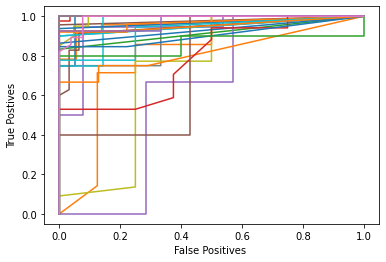

In [54]:
generate_ROC_curves_mutliclass(automated_df_tweety, manual_chunked_df)

# AUC Score Dataframe and Histograms for Pipelines 

### Function to generates AUC scores dataframe 

In [34]:
#run bird net on entirety of Mixed_Bird
#get AUC score for each species from the output of the Tweety->Birdnet pipeline
#complete
def generate_AUC_scores_df(multi_df, manual_chunked_df): 
    auc_scores = {} #directory {"species": auc score}
    auc_scores_df = pd.DataFrame()
    species_names  = np.unique(multi_df["MANUAL ID"])
    
    for species in species_names:

        multi_species_df = multi_df[multi_df["MANUAL ID"] == species]
        manual_species_df = manual_chunked_df[manual_chunked_df["MANUAL ID"] == species]
        score = generate_ROC_curves_mutliclass(multi_species_df, manual_species_df)
        auc_scores[species] = score

    species_auc_scores_df = auc_scores_df.from_dict({'SPECIES': list(auc_scores.keys()),'AUC SCORES': list(auc_scores.values())})
 
    return species_auc_scores_df

### TweetyNet to BirdNet AUC scores

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.76501471 0.88590324 0.         0.89137179 0.14806335
 0.         0.80561519 0.48670495 0.4989807  0.03880388 0.90724015
 0.         0.75200742 0.56059623 0.         0.63359678 0.87208998
 0.37402162]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 59
confidence 59
automated df 59
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
[0.         0.92361689 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.58892268 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04332038 0.31518343
 0.63047707 0.30132818 0.72266322 0.         0.         0.12119458
 0.         0.25459853 0.45915714 0.         0.95315725 0.76259613
 0.46220875 0.         0.         0.07014465 0.42197517]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.82332104 0.         0.72533834 0.         0.         0.
 0.81942087 0.         0.         0.84730196 0.         0.2093664
 0.         0.         0.         0.         0.         0.
 0.         0.59059501 0.26088929 0.         0.         0.
 0.         0.         0.45546144 0.09748877 0.07743394 0.        ]
target

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.93712395 0.97357053 0.         0.         0.         0.78925663
 0.94033295 0.90632981 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.81657189]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1.]
[0.         0.90353787 0.70764661 0.62695312 0.73139405 0.56201667
 0.88376164 0.79523551 0.61924148 0.29692498 0.90923721 0.17761755
 0.56113458 0.38649765 0.88473576 0.         0.13581799 0.25861168
 0.30272931 0.         0.         0.         0.         0.
 0.         0.         0.23535407 0.         0.         0.
 0.         0.84206653]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1.]
[0.99057466 0.         0.98001808 0.         0.96079522 0.07228868
 0.99294829 0.22420321 0.97640073 0.         0.98707926 0.
 0.98594493 0.         0.98025686 0.98919386 0.40637821 0.98752731
 0.         0.9705795  0.         0.97692275 0.         0.91103441
 0.         0.98135477 0.         0.95198357 0.         0.92681611]
target 16
confidence 16
automated df 16
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
[0.45543376 0.86170018 0.         0.         0.         0.79414827
 0.93240511 0.         0.         0.62659276 0.55918574 0.
 0.         0.         0.11575452 0.83925945]
target 34
confidence 34
automated df 34
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.25063434 0.9846437  0.99952161 0.98802209 0.99041092
 0.99722075 0.84048992 0.98707271 0.98052716 0.99683857 0.
 0.997

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99916422 0.98791599 0.         0.99545836 0.99776924 0.99837995
 0.         0.99709082 0.         0.99340904 0.99788827 0.75230289
 0.98877585 0.95439684 0.         0.99624026 0.97687006 0.
 0.99435729 0.99884003 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[0.88890564 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
target 8
confidence 8
automated df 8
[0. 1. 0. 1. 0. 1. 0. 0.]
[0.         0.11084307 0.         0.42365277 0.         0.
 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 8
confidence 8
automated df 8
[1. 1. 1. 1. 1. 1. 0. 0.]
[0.980205   0.         0.79489076 0.98968643 0.93628299 0.97443807
 0.         0.        ]
target 17
confidence 17
automated df 17
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.         0.         0.16637641 0.36739105 0.
 0.         0.         0.         0.         0.13936906 0.
 0.72143894 0.22548334 0.         0.         0.        ]
target 12
confidence 12
automated df 12
[1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.99564028 0.         0.         0.         0.99876899 0.
 0.         0.         0.         0.         0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 48
confidence 48
automated df 48
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.9905776  0.9785795  0.6725377  0.9541361  0.9987978  0.9938356
 0.9760498  0.99301696 0.99856216 0.939682   0.9357661  0.91832143
 0.9708991  0.9944719  0.9988826  0.9991153  0.98813325 0.9996482
 0.99513274 0.9991886  0.9979431  0.9984646  0.9953277  0.9995017
 0.99711037 0.9972474  0.9972     0.9969086  0.99922097 0.98413205
 0.99686193 0.9987325  0.99782723 0.9996964  0.99846905 0.9844685
 0.95421857 0.9974751  0.93333805 0.9987231  0.99634224 0.9904253
 0.9914767  0.99801445 0.9875853  0.98815143 0.9963999  0.9766282 ]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 65
confidence 65
automated df 65
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.76911741 0.8907907  0.         0.         0.79039782 0.93570191
 0.79956102 0.         0.         0.         0.96145582 0.88835824
 0.47619286 0.         0.         0.         0.90738034 0.75034511
 0.59340137 0.         0.         0.         0.         0.93583834
 0.89008361 0.95736223 0.         0.         0.         0.
 0.         0.         0.86172044 0.89755058 0.9891482  0.98602319
 0.7848525  0.         0.9642477  0.9891479  0.99507362 0.68864685
 0.         0.99434519 0.99707854 0.         0.         0.99413007
 0.99739778 0.         0.98899251 0.99693644 0.7026183  0.92535716
 0.97072101 0.         0.         0.75111628 0.7812317  0.99784744
 0.         0.         0.         0.97575426 0.97885293]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[0.79356891 0.76848292 0.88903964 0.85491836 0.45670021 0.57207084
 0.08050104 0.6233288  0.         0.72308052 0.76253277 0.
 0.90958792 0.98447704 0.         0.94560897 0.97210807 0.
 0.9155758 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1.]
[0.74388129 0.72597331 0.         0.         0.         0.
 0.         0.65607101 0.         0.91624945 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.35985681 0.19357373 0.33697569 0.
 0.         0.90735877]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
[0.95186079 0.         0.44808528 0.         0.70723176 0.
 0.         0.11177676 0.86609447 0.         0.61907393 0.98478067
 0.         0.         0.         0.         0.65771705 0.72446352
 0.6792509 ]
target 7
confidence 7
automated df 7
[1. 1. 1. 0. 1. 1. 1.]
[0.         0.6858927  0.         0.         0.         0.39331609
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 13
confidence 13
automated df 13
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
[0.99687946 0.         0.         0.         0.90775847 0.99462789
 0.         0.         0.99740618 0.99679875 0.99257255 0.
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 66
confidence 66
automated df 66
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
[0.93991703 0.         0.         0.         0.77348548 0.
 0.         0.         0.         0.52740818 0.         0.
 0.         0.         0.         0.91333985 0.         0.16740175
 0.43232608 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.64590961 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1849712
 0.         0.         0.         0.         0.64957863 0.
 0.         0.         0.         0.         0.         0.
 0.3009854  0.62793261 0.         0.         0.         0.63642484]
target 41
confidence 41
automated df 41
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
[0.64976168 0.         0.         0.         0.93873024 0.
 0.         0.83749098 0.67712873 0.         0.         0.93607563
 0.         0.89742994 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1.]
[0.         0.87384373 0.         0.69441003 0.         0.92697811
 0.         0.7425313  0.         0.7962926  0.         0.88562739
 0.75523317 0.97735345 0.         0.99048549 0.         0.
 0.96986556 0.         0.80629092 0.         0.         0.98667347
 0.         0.95270324 0.92711949 0.         0.97634274 0.10360099
 0.         0.98453343]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 55
confidence 55
automated df 55
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.10613813 0.         0.18582776 0.         0.97590762
 0.         0.29895282 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.62481886 0.08324851
 0.         0.         0.78371954 0.63438052 0.03592201 0.76521295
 0.         0.92659169 0.27434137 0.91402811 0.53393412 0.
 0.97899044 0.         0.0621585  0.02192725 0.20398371 0.07838392
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0.9215737  0.91128045 0.         0.77175957 0.85827738 0.56994444
 0.86947501 0.         0.         0.         0.05980287 0.
 0.         0.         0.         0.         0.1430499  0.
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 67
confidence 67
automated df 67
[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0.93501544 0.98741955 0.         0.         0.         0.96942353
 0.99966657 0.88198704 0.99825376 0.99956805 0.61171037 0.
 0.         0.         0.         0.         0.         0.
 0.         0.99497885 0.96216977 0.49250343 0.         0.
 0.86493969 0.99571878 0.99961948 0.99673283 0.         0.
 0.99945647 0.97949481 0.99065477 0.96153992 0.99898154 0.08916607
 0.         0.         0.         0.         0.71573853 0.9986921
 0.99843031 0.98844355 0.96920913 0.         0.         0.
 0.         0.99643022 0.99698144 0.98453701 0.98942751 0.97329235
 0.         0.90893435 0.92424303 0.         0.         0.
 0.         0.         0.         0.99055076 0.73837775 0.9063074
 0.99256998]
target 29
confidence 29
automated df 29
[1. 1. 1. 1. 1.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

target 29
confidence 29
automated df 29
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0.]
[0.88258058 0.43831694 0.         0.         0.77141309 0.85587978
 0.         0.61588937 0.21745305 0.         0.93663377 0.
 0.         0.10530332 0.89788133 0.         0.88739133 0.96548057
 0.         0.76508605 0.         0.         0.         0.93980455
 0.91957021 0.         0.         0.92272019 0.        ]
target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
[0.94829434 0.23261121 0.         0.         0.         0.
 0.67108542 0.92437387 0.         0.         0.         0.68535453
 0.97363245 0.         0.         0.         0.         0.90014136
 0.93841416]
target 52
confidence 52
automated df 52
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.9834067  0.9925787  0.97085154 0.9934076  0.9

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.9993369  0.9984428  0.9984137  0.99921656 0.9994036  0.9983072
 0.9988932  0.9570895  0.7231956  0.9962852  0.9807067 ]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99763143 0.970355   0.9751761  0.8688831  0.9506929  0.98970747
 0.96980715 0.96634233 0.9765063  0.9641315  0.98745584 0.99836403
 0.97986495 0.9628388  0.98893166 0.9899762 ]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.9679414  0.96809131 0.92754436 0.         0.99498391 0.99827313
 0.         0.         0.99699497 0.         0.         0.97285163
 0.24876915 0.84460813 0.88336861 0.78520274 0.         0.71441025
 0.        ]
target 34
confidence 34
automated df 34
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.99672228 0.85341513 0.9867909  0.         0.         0.90519512
 0.99021238 0.         0.         0.94387609 0.92402983 0.
 0.97481298 0.         0.99090427 0.         0.98210955 0.
 0.98893356 0.90729475 0.08470501 0.9427458  0.99861383 0.60105342
 0.58235484 0.         0.         0.         0.9932766  0.76893795
 0.         0.22363353 0.         0.65753818]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0.91394144 0.         0.98638594 0.90420848 0.99498415 0.81625021
 0.93734145 0.         0.98244929 0.99819297 0.         0.
 0.         0.         0.         0.80068552 0.55344141 0.
 0.17038848 0.         0.         0.53999442 0.26522735 0.70448881
 0.         0.65982789 0.25149912 0.97370356 0.2367941  0.2238978
 0.76647055 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
[1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0.]
[0.80153185 0.85930014 0.         0.         0.         0.
 0.         0.95613909 0.96404016 0.94459563 0.         0.
 0.         0.         0.69683504 0.68360007 0.05536029 0.
 0.         0.         0.         0.33053675 0.98877025 0.99275923
 0.        ]
target 14
confidence 14
automated df 14
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0.74993569 0.         0.         0.92719793 0.         0.91875762
 0.         0.         0.         0.45083824 0.         0.
 0.82715619 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0.         0.63794827 0.         0.         0.         0.8577556
 0.         0.         0.66009837 0.82656354 0.98953044 0.03295759
 0.9859035  0.         0.         0.97178358 0.        ]
target 7
confidence 7
automated df 7
[1. 1. 0. 0. 0. 0. 1.]
[0.56428277 0.68679196 0.         0.         0.         0.
 0.59436971]
target 8
confidence 8
automated df 8
[1. 1. 0. 0. 0. 0. 1. 1.]
[0.99820769 0.49773979 0.         0.         0.         0.
 0.99202031 0.99554944]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/

target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.8416626  0.9161429  0.9576943  0.87871116 0.9181192  0.8769869
 0.9033952  0.93583107 0.9021097 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.97042972 0.91619241 0.31912634 0.         0.         0.09071714
 0.86692828 0.85095412 0.         0.95976359 0.92516357 0.
 0.86661178 0.97584212 0.29719934 0.         0.94081187 0.96352905
 0.         0.98455596 0.96120435 0.96447909]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
[0.50569439 0.72494346 0.         0.         0.88353765 0.
 0.         0.         0.         0.72445172 0.         0.
 0.         0.         0.         0.50231439 0.         0.47506434
 0.         0.         0.         0.58203316]
target 50
confidence 50
automated df 50
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1.]
[0.         0.50225502 0.         0.         0.         0.47982693
 0.48679218 0.99221146 0.98655695 0.         0.         0.
 0.95724785 0.95102441 0.         0.         0.         0.
 0.         0.98886395 0.99669421 0.99511802 0.99209481 0.
 0.         0.95670998 0.9978236  0.99303597 0.         0.
 0.         0.         0.99870384 0.99250984 0.         0.
 0.         0.99590212 0.9887771  0.         0.         0.
 0.         0.99853098 0.98824662 0.         0

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0.99775118 0.99983585 0.         0.99831259 0.         0.99982637
 0.99958032 0.99984241 0.         0.99933261 0.99940479 0.99118
 0.         0.99055266 0.         0.99913883 0.         0.
 0.        ]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99520481 0.99136955 0.99698347 0.99366635 0.46366918 0.97579342
 0.98986608 0.96118242 0.39387071 0.68031228 0.04677226 0.57936871
 0.         0.57465106 0.24837181 0.49186674 0.75294298 0.91438347
 0.27312857]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1.]
[0.         0.1925222  0.         0.         0.72229332 0.
 0.22549491 0.         0.         0.         0.49304128 0.
 0.         0.         0.         0.37174925 0.         0.
 0.56101185 0.         0.         0.         0.         0.
 0.448603   0.         0.72512895 0.09092595 0.         0.
 0.         0.         0.         0.33140826 0.         0.
 0.         0.         0.44837928 0.         0.47012258 0.06777505
 0.         0.         0.50386471 0.         0.         0.64087242
 0.67491895 0.         0.         0.         0.5713104  0.46970999]


,SPECIES,AUC SCORES
184,Pipreola arcuata,0.671429
129,Lepidothrix coronata,0.681818
198,Pseudotriccus ruficeps,0.685484
188,Piprites chloris,0.730952
200,Psittacara leucophthalmus,0.766667
256,Thamnophilus palliatus,0.769231
10,Ara chloropterus,0.796498
192,Platyrinchus mystaceus,0.800000
266,Tolmomyias sulphurescens,0.821429
247,Taraba major,0.823529


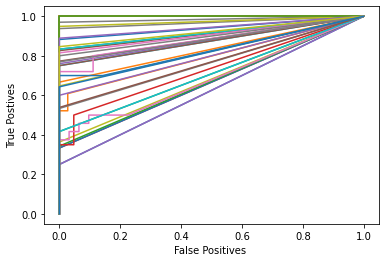

In [35]:
auc_scores_df = generate_AUC_scores_df(multi_df,manual_chunked_df)
auc_scores_df = auc_scores_df.drop_duplicates(subset=['AUC SCORES'], keep = False)
auc_scores_df.sort_values(by = "AUC SCORES")

In [55]:
auc_scores_df

,SPECIES,AUC SCORES
10,Ara chloropterus,0.796498
13,Ara severus,0.880000
16,Asthenes helleri,0.913043
19,Automolus infuscatus,0.984848
54,Chiroxiphia boliviana,0.833333
100,Epinecrophylla ornata,0.968750
129,Lepidothrix coronata,0.681818
184,Pipreola arcuata,0.671429
188,Piprites chloris,0.730952
192,Platyrinchus mystaceus,0.800000


### TweetyNet Pipeline AUC scores

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.96161896 0.78991277 1.         1.         0.84866364 0.54670074
 0.75931112 0.86109182 0.89268959 0.98746391 0.67029172 0.75779247
 0.65180881 1.         0.74802346 0.74802346 0.4657128  0.58993334
 0.89373307]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 59
confidence 59
automated df 59
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
[0.         1.         0.         0.         0.         0.75774506
 0.27185146 0.88099429 0.         0.         0.         0.
 0.15048184 0.         0.         0.35343224 0.         0.23926976
 0.         0.         0.         0.16718011 0.79295344 0.79295344
 0.         0.         0.33392564 0.         0.24060281 0.
 0.19799531 0.         0.         0.2974189  0.         0.23729317
 0.27933746 0.         0.30966935 0.33209562 0.82053944 0.79063172
 1.         0.91644046 0.90782311 0.         0.         0.23919473
 0.22283916 0.81593766 0.81593766 0.         0.75875986 0.8566931
 0.8566931  0.         0.45426085 0.54562908 0.46418149]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.72908656 0.         0.92345881 0.7702324  0.         0.
 0.9514001  0.9514001  0.         0.87670744 0.72087085 0.72087085
 0.90195702 0.90195702 0.80419891 0.81992428 0.         0.90039995
 0.         1.         1.         0.84883652 0.84883652 1.
 1.         0.90433576 0.79241185 0.79241185 0.86618873 0.89959145]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.84516613 0.91359333 0.         0.         0.         1.
 1.         0.90421482 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.79133275]
target 32
confidence 32
automated df 32
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1.]
[0.         0.95511553 0.95511553 0.95511553 0.95511553 0.89671549
 0.89671549 0.97240124 0.97240124 0.9985106  0.90822114 0.95429067
 1.         1.         0.88746558 0.         0.78718051 0.78718051
 0.94381582 0.         0.         1.         1.         0.73333964
 0.73333964 0.         0.95010155 0.95010155 0.85810324 0.
 0.17018933 0.99758857]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 30
confidence 30
automated df 30
[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1.]
[0.88709538 0.         0.89951439 0.94424444 0.94424444 1.
 1.         0.93760264 0.93760264 0.         0.89438392 0.
 0.90020179 0.         0.84750874 0.84750874 0.91409178 0.91409178
 0.92460768 0.92460768 0.         0.8423815  0.         0.94111924
 0.         0.89572616 0.         0.95155696 0.95155696 0.93180884]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
[0.97603411 0.97603411 0.         0.         0.         0.96990845
 0.96990845 0.39449361 0.         1.         1.         0.41316405
 0.         0.34661245 0.99079929 0.99079929]
target 34
confidence 34
automated df 34
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.69104997 0.9315593  0.88749119 0.99001266 0.85869332
 0.87312341 0.94426013 0.9142583  0.85784862 1.         0.88280986
 0.86704322 0.82315078 0.85643616 0.85643616 0.8653505  0.95866256
 0.95866256 0.90147573 0.81374065 0.88863559 0.93010816 0.91278285
 0.91278285 0.89441336 0.8734863  1.         0.88331349 0.96465019
 0.94959887 0.81168925 0.79410229 0.79702158]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.86335424 0.91708126 0.91708126 1.         1.         0.97044307
 0.95531277 0.88435157 0.90734585 0.94

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 21
confidence 21
automated df 21
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.95119453 0.86556394 0.7441757  0.73633211 0.97491992 0.93187328
 0.         0.8748702  0.         0.944943   0.93421442 1.
 1.         0.94703987 0.94703987 0.90325457 0.91234178 0.91234178
 0.84435445 0.80157723 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 23
confidence 23
automated df 23
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[1.         0.         0.         0.         0.         0.86334072
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.25253619 0.24515193 0.30984399 0.33890637]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 15
confidence 15
automated df 15
[1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
[0.97311936 0.         0.         0.76428164 0.76428164 0.
 0.27950229 0.         0.80101941 0.41294273 1.         1.
 0.62273302 0.62609907 0.41144688]
target 8
confidence 8
automated df 8
[1. 1. 1. 1. 1. 1. 0. 0.]
[0.86788432 1.         1.         0.90169672 0.91596153 0.45553675
 0.         0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.48184903 0.88855349 0.88855349 0.88855349 0.88855349
 0.72584119 0.84656837 0.84656837 0.85875625 0.85875625 0.97002137
 0.76607095 0.76607095 1.         1.         1.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 31
confidence 31
automated df 31
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1.]
[0.90964046 0.53383993 0.         0.90517597 0.90517597 0.65745064
 0.65745064 0.67867788 0.67867788 0.503328   0.92076584 0.78191846
 0.48191144 0.90512332 0.         0.         1.         1.
 0.77563888 0.85692209 0.51777451 0.77848977 0.75938949 1.
 0.75799235 0.75799235 0.         0.         0.         0.43153596
 0.69444252]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 48
confidence 48
automated df 48
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.79580703 0.78332561 0.78332561 1.         0.93054932 0.89080687
 0.9256594  0.92460471 0.7816735  0.85345042 0.69363558 0.85053656
 0.84568938 0.78461638 0.58928565 0.25413483 0.7936333  0.7936333
 0.69815416 0.53231103 0.96241446 0.61047156 0.83509416 0.69268662
 0.88800225 0.85893837 0.78913284 0.86660623 0.89675099 0.96464114
 0.84339526 0.8479034  0.8497549  0.86962371 1.         1.
 0.8445965  0.64801486 0.23891753 0.62461716 0.67438852 0.58605547
 0.55990496 0.69790424 0.82803427 0.92609632 0.92609632 0.95539474]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 65
confidence 65
automated df 65
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
[0.91101168 0.91101168 0.         0.         0.79731291 0.89179929
 0.89179929 0.         0.         0.         0.87114253 0.95153172
 0.95153172 0.         0.         0.         1.         1.
 1.         0.         0.         0.         0.         0.81907166
 0.90739648 0.90739648 0.         0.         0.         0.08765478
 0.         0.         0.99611752 0.99611752 0.93696058 0.93696058
 0.93696058 0.         0.88348464 0.96114919 0.96114919 0.96114919
 0.         1.         1.         0.         0.         0.78136893
 0.96288048 0.         0.94029083 0.94029083 0.88034001 0.88034001
 0.88034001 0.         0.         0.95863915 0.95863915 0.95863915
 0.         0.         0.21683792 0.9895425  0.9895425 ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[1.         1.         0.7983128  0.80614838 0.94186804 0.94186804
 0.82395332 0.65639926 0.         0.56583908 0.46014774 0.
 0.64715028 0.14762942 0.         0.28839047 0.19226326 0.291693
 0.31240968]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 26
confidence 26
automated df 26
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1.]
[1.         0.93520523 0.92622058 0.92622058 0.82116922 0.83960296
 0.83960296 0.896626   0.87018536 0.80491438 0.72010759 0.72010759
 0.         0.47959826 0.66924342 0.66924342 0.48138791 0.44074871
 0.4143175  0.84094846 0.84094846 0.41816568 0.41816568 0.46723447
 0.         0.53566761]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
[1.         0.59238195 0.84318804 0.84318804 0.8809221  0.8809221
 0.3865411  0.82345229 0.87922164 0.         0.84844892 0.87462299
 0.         0.         0.         0.         0.48319876 0.48319876
 0.51198876]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.98375334 0.98375334 0.74999201 0.61802997 0.31279863 0.2936477
 0.29431283 0.36452924 0.35527922]
target 10
confidence 10
automated df 10
[1. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
[0.77072122 0.5671347  0.76195282 0.         1.         0.
 0.92529866 0.92529866 0.         0.83730585]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
[1. 1. 1. 0. 1. 1. 1.]
[0.         0.79918828 0.82326145 0.         0.20784686 0.85650944
 0.98845258]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 17
confidence 17
automated df 17
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
[0.75059254 0.95886128 0.82179051 0.81637683 0.81637683 0.75308381
 0.94783927 0.94783927 0.99094957 0.99094957 1.         1.
 0.         0.70574625 0.         0.         0.75633288]
target 13
confidence 13
automated df 13
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
[0.97210455 1.         1.         0.94181321 0.9551868  0.9551868
 0.         0.92067299 0.91223996 0.86794727 0.99217337 0.37332703
 0.70273718]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 66
confidence 66
automated df 66
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
[0.94398921 0.94398921 0.         0.         0.99304988 0.99304988
 0.44208826 0.         1.         1.         0.         0.
 0.         0.         0.93943533 0.93943533 0.87624102 0.94764783
 0.94764783 0.39839203 0.         0.         0.         0.
 0.         0.70544567 0.70544567 0.         0.51362125 0.
 0.         1.         1.         1.         0.52081706 0.52081706
 0.         0.         0.         0.         0.         0.79541954
 0.79541954 0.73557184 0.         0.         0.         0.67767397
 0.77827529 0.77827529 0.         0.         0.85856774 0.85856774
 0.84956738 0.         0.         0.         0.         0.
 0.43291569 0.43627684 0.         0.         0.99098625 0.99098625]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 45
confidence 45
automated df 45
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
[0.90678627 0.         0.66401152 0.66401152 0.         0.
 0.         0.         0.91713176 0.         0.         0.
 0.         0.         0.97017599 0.         0.         0.
 0.84596466 0.84596466 0.         0.         0.         0.22595653
 0.         0.10832216 0.87796707 0.         0.         0.10476146
 0.         0.21318667 0.         0.         0.33128359 0.
 0.26031588 0.26031588 0.         0.         0.         0.
 0.         0.48568886 0.07138772]
target 4
confidence 4
automated df 4
[0. 0. 1. 1.]
[0.         0.53876439 1.         1.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 41
confidence 41
automated df 41
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.95512762 0.9229273  0.9229273  0.71648154 0.82720606 0.8940365
 0.8940365  0.20740076 0.30050442 0.44813076 1.         0.92323952
 0.92323952 0.         0.         0.         0.         0.
 1.         1.         0.         0.         0.         0.
 0.         0.89179663 0.89179663 0.         0.         0.
 0.         0.94224436 0.94224436 0.         0.         1.
 0.78640928 0.82280842 0.82280842 0.73315557 0.87042911]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
[0.96648435 0.86893475 0.         0.         0.43026436 0.19218174
 0.         0.18707185 0.24076284 0.         0.         0.15990733
 0.         0.21391048 0.24092678 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1.]
[0.         0.78086878 0.         0.83212182 0.         1.
 0.         0.84425783 0.         0.52275588 0.52275588 0.44561365
 0.44561365 0.75212469 0.         0.71387907 0.         0.
 0.80162363 0.         0.88087367 0.88087367 0.         0.93824122
 0.         0.65123031 0.65123031 0.         0.74759818 0.74759818
 0.         0.93534752]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 55
confidence 55
automated df 55
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.91567269 0.91567269 0.         0.
 0.         0.16718645 0.20525343 0.3818901  0.3818901  1.
 1.         0.38021379 0.         0.         0.         0.
 0.69203241 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.89226762 0.89226762
 0.         0.         0.97168459 0.97168459 0.18654515 0.98498271
 0.         0.90762551 0.92274823 0.94329416 0.94329416 0.87812297
 0.87812297 0.40225928 0.68565592 0.55724816 0.32803193 0.50336444
 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0.96025855 0.96025855 1.         1.         1.         1.
 0.86354563 0.88861444 0.         0.89486284 0.97958497 0.41395286
 0.         0.44712066 0.62233976 0.655067   0.655067   0.52501062
 0.72430396]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 67
confidence 67
automated df 67
[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0.83511761 0.88385164 0.         0.         0.61928946 0.97986541
 0.97986541 0.97986541 0.97986541 0.97986541 0.97986541 0.
 0.         0.         0.         0.         0.         0.
 0.37746389 0.78601398 0.7776803  0.7776803  0.         0.
 0.93494739 0.93494739 0.93494739 0.93494739 0.         0.32925129
 0.96415277 0.96415277 0.96415277 0.96415277 0.96415277 0.64216374
 0.         0.         0.         0.         0.73325075 0.9293268
 0.9293268  0.9293268  0.8263461  0.         0.         0.
 0.         0.90774827 0.90774827 1.         1.         1.
 0.         0.81228412 0.74397157 0.         0.         0.
 0.         0.         0.         1.         1.         0.86687261
 0.86687261]
target 29
confidence 29
automated df 29
[1. 1. 1. 1. 1

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 29
confidence 29
automated df 29
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0.]
[0.97305491 0.80048814 0.80048814 0.         0.95965323 0.77748987
 0.         0.73503309 0.73503309 0.81289274 0.81289274 0.39907275
 0.         0.87939655 0.87939655 0.42867904 0.85988876 0.85988876
 0.4185443  0.7466763  0.         0.         0.         1.
 1.         0.         0.         0.74253651 0.        ]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
[0.93765356 0.93765356 0.         0.         0.         0.
 0.99294217 0.99294217 0.         0.         0.         0.9969105
 0.9969105  0.         0.         0.         0.         1.
 1.        ]
target 52
confidence 52
automated df 52
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.80476087 0.88906741 0.94565155 0.94565155 0.91845323 0.96654972
 0.94905267 0.94905267 0.95819486 0.94035861 1.         0.9567844
 0.89851149 0.89851149 0.76315405 0.88208393 0.82407817 0.93297398
 0.949296   0.8359962  0.8359962  0.8170585  0.78696466 0.8554548
 0.84696382 0.79633565 0.7765944  0.74430149 0.97974145 0.72791261
 0.73184778 0.84279704 0.94605307 0.94605307 0.88049161 0.88395207
 0.88395207 0.86478079 0.93410314 0.94570739 0.94216853 1.
 0.96638401 0.96638401 0.94394818 0.89463544 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 11
confidence 11
automated df 11
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.77822502 0.85163043 0.85551045 0.85551045 0.83586599 0.80386506
 0.78444912 0.79061215 0.79061215 0.81462554 1.        ]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 16
confidence 16
automated df 16
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.93278301 0.93278301 0.87660277 0.92219846 0.92219846 0.89702608
 0.89702608 0.84786458 0.96381534 0.96381534 0.77037981 1.
 1.         0.88567903 0.80739489 0.81773393]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.909382   0.83591585 0.83591585 0.         0.87583299 0.864868
 0.         0.74322461 0.79009572 0.         0.         0.98387631
 0.85657741 0.68786999 0.68786999 0.94584484 0.94584484 0.869232
 0.46103384]
target 34
confidence 34
automated df 34
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
[0.88520611 0.84466706 0.84466706 0.50753735 0.         0.84288363
 0.84288363 0.87377249 0.87377249 0.89473626 0.84179613 0.84179613
 0.96058285 0.         1.         0.         0.89403721 0.89403721
 0.93087874 0.85821247 0.85821247 0.95384286 0.99627639 0.99627639
 0.50374883 0.         0.         0.         1.         1.
 0.         0.35908566 0.         0.74746904]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 32
confidence 32
automated df 32
[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0.88657942 0.         0.84736216 0.93563194 0.83575442 0.80637547
 0.74870889 0.         0.51509927 0.42240464 0.         0.
 0.         0.         0.96291429 0.9192047  0.91000599 0.81700656
 0.82006593 0.83139207 0.67836004 0.86430238 0.86594309 1.
 0.90152911 0.88338313 0.83400491 0.89446719 0.84583887 0.75546654
 0.82319235 0.82319235]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 25
confidence 25
automated df 25
[1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0.]
[0.84398771 0.84398771 0.84398771 0.84398771 0.90221849 0.90221849
 0.66851425 0.97120096 0.97120096 0.97120096 0.72131827 0.73513002
 0.73513002 0.8726477  0.8726477  0.8535806  0.8535806  0.8099035
 1.         1.         1.         0.94017468 0.94017468 0.94017468
 0.52055827]
target 14
confidence 14
automated df 14
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0.86988589 0.86988589 0.914786   0.914786   0.88411616 0.88411616
 0.         0.78506378 0.78506378 0.79974279 0.79974279 0.
 0.91102535 0.81402958]
target 17
confidence 17
automated df 17
[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0.60156274 1.         0.         0.7485576  0.69058196 0.69058196
 0.         0.26516945 0.63037904 0.63037904 0.87127105 0.81697312
 0.83638972 0.83638972 0.81581244 0.64545431 0.64545431]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 7
confidence 7
automated df 7
[1. 1. 0. 0. 0. 0. 1.]
[1.         1.         0.         0.         0.67294113 0.67294113
 0.90507255]
target 8
confidence 8
automated df 8
[1. 1. 0. 0. 0. 0. 1. 1.]
[1.         1.         0.         0.         0.         0.
 0.95266633 0.95266633]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


target 9
confidence 9
automated df 9
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.83122808 0.90954393 0.84243007 0.84243007 0.40666095 0.38234703
 0.80198276 0.79871741 0.79993285]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.99578399 0.99578399 0.99578399 0.         0.         0.97046652
 0.97046652 1.         0.         0.89709098 0.89709098 0.89709098
 1.         1.         1.         0.85278384 0.86086151 0.86086151
 0.         0.70329583 0.81564944 0.81564944]


/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 22
confidence 22
automated df 22
[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
[0.90721429 0.90721429 0.55229928 0.55229928 0.98968444 0.98968444
 0.         0.         0.         0.90501776 0.90501776 0.
 0.         0.         0.         0.98867418 0.94947651 1.
 0.         0.         0.7130236  0.7219105 ]
target 50
confidence 50
automated df 50
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1.]
[1.         1.         0.         0.         0.         0.96204812
 0.96204812 1.         1.         0.         0.         0.27680547
 0.98424249 0.98424249 0.98424249 0.         0.         0.20629337
 0.19706227 0.91627259 0.91627259 0.99775617 0.99775617 0.
 0.         1.         1.         1.         0.         0.
 0.         0.75548019 0.86587711 0.86587711 0.         0.
 0.         0.83063728 0.83063728 0.         0.17265215 0.17265215
 0.         0.7910144 

/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_

target 7
confidence 7
automated df 7
[1. 1. 1. 1. 1. 1. 1.]
[1.         0.71509685 0.68983997 0.         0.         0.55603961
 0.41997346]
target 19
confidence 19
automated df 19
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0.92004453 0.88095972 0.34412887 0.74297163 0.35702479 0.99047423
 0.90234436 0.90234436 0.25526334 0.83804148 1.         1.
 0.         0.82396074 0.         0.96043746 0.         0.
 0.94513409]
target 19
confidence 19
automated df 19
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         1.         1.         1.         0.98179333 0.98179333
 0.98179333 0.84717827 0.94816145 0.94816145 0.90715069 0.90715069
 0.8609608  1.         1.         0.93486651 0.93486651 0.93486651
 0.93486651]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/vanessasalgado/Desktop/E4E-Acoustics.nosync/PyHa/PyHa/annotation_post_processing.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 54
confidence 54
automated df 54
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1.]
[0.52583581 0.6950375  0.6950375  0.         0.5643467  0.
 0.945892   0.         0.         0.         0.80385515 0.80385515
 0.14621723 0.         0.         1.         0.29207578 0.
 0.42451422 0.53619352 0.12473613 0.         0.         0.
 0.60892985 0.         0.76052297 0.76052297 0.         0.
 0.35771227 0.2647099  0.         0.32993281 0.32993281 0.
 0.30818265 0.         0.73707664 0.         0.37113511 0.9084563
 0.9084563  0.         0.78502055 0.78502055 0.         0.24752398
 0.85049208 0.85049208 0.16424375 0.17108085 0.27574878 0.92383331]


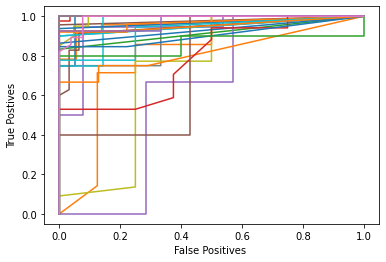

In [57]:
tweetyNet_auc_scores_df = generate_AUC_scores_df(automated_df_tweety,manual_chunked_df)
tweetyNet_auc_scores_df = tweetyNet_auc_scores_df.drop_duplicates(subset=['AUC SCORES'], keep = False)
tweetyNet_auc_scores_df = tweetyNet_auc_scores_df.sort_values(by = "AUC SCORES");

In [59]:
tweetyNet_auc_scores_df 

,SPECIES,AUC SCORES
35,Pachyramphus polychopterus,0.619048
27,Lepidothrix coronata,0.721591
56,Thamnomanes schistogynus,0.742857
54,Taraba major,0.786765
12,Chiroxiphia boliviana,0.812500
42,Pseudotriccus ruficeps,0.827957
63,Thamnophilus schistaceus,0.860000
21,Epinecrophylla ornata,0.895833
61,Thamnophilus palliatus,0.905983
33,Neopipo cinnamomea,0.916667


### Distribution of TweetyNet to BirdNet AUC scores

<AxesSubplot:title={'center':'Distribution of TweetyNet to BirdNet AUC scores'}, ylabel='Frequency'>

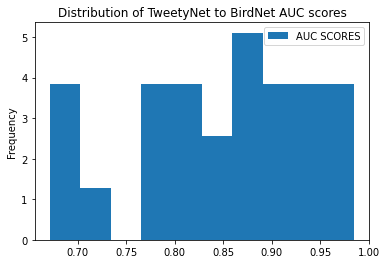

In [74]:
#auc_scores_df.plot.hist(y='AUC SCORES', rot=0, density = True)
auc_scores_df.plot.hist(bins=10, density = True, title = "Distribution of TweetyNet to BirdNet AUC scores")

In [ ]:
#matplotlib


### Distribution of TweetyNet Pipeline AUC Scores

<AxesSubplot:title={'center':'Distribution of TweetyNet to BirdNet AUC scores'}, ylabel='Frequency'>

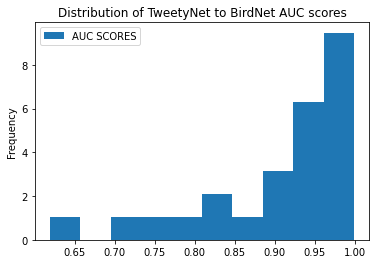

In [76]:
tweetyNet_auc_scores_df.plot.hist(bins=10, density = True, title = "Distribution of TweetyNet to BirdNet AUC scores")

In [6]:
# merge data frames
df_cd = pd.merge(auc_scores_df, tweetyNet_auc_scores_df, on='SPECIES', suffixes=('_T2B', '_T'), how = "left")
df_cd

NameError: name 'auc_scores_df' is not defined

NameError: name 'df_cd' is not defined

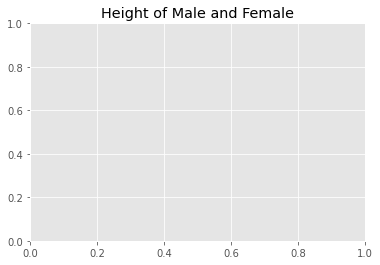

In [3]:
# histogram for combined AUC score 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
 
plt.title('Height of Male and Female')
 
plt.hist(df_cd["AUC SCORES_T2B"], edgecolor='black',color='blue',bins=10,label='Tweety to Birdnet Pipeline')
plt.hist(df_cd["AUC SCORES_T"], edgecolor='black',color="#FFA500",bins=10,label='TweetyNet Pipeline')
 
plt.legend(loc='upper right')
 
plt.xlabel('Height')
plt.ylabel('Number of People')
 
plt.tight_layout()
 
plt.show()

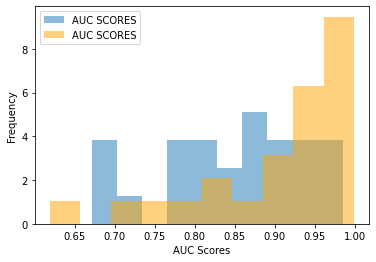

In [94]:
# can we look at them sideby side 
# combine 
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
auc_scores_df.plot.hist(bins=10, density = True, ax = ax, alpha=0.5, label= 'Tweety to Birdnet Pipeline')
tweetyNet_auc_scores_df.plot.hist(bins=10, density = True, ax = ax, color = "#FFA500",alpha=0.5,label='TweetyNet Pipeline')
plt.xlabel('AUC Scores')
plt.title = "Distribution of AUC scores"
plt.show()

# TO DO: Statistics Metrics

### Statistics Metrics on TweetyNet to BirdNET pipeline

In [58]:
t2b_statistics_df = automated_labeling_statistics(manual_chunked_df, multi_df, stats_type="general")
t2b_statistics_df

Something went wrong with: Aburria-aburri-257423.wav
list index out of range
Something went wrong with: Aburria-aburri-387212.wav
list index out of range
Something went wrong with: Accipiter-bicolor-451839.wav
list index out of range
Something went wrong with: Accipiter-collaris-260335.wav
list index out of range
Something went wrong with: Accipiter-collaris-260336.wav
list index out of range
Something went wrong with: Accipiter-poliogaster-40546.wav
list index out of range
Something went wrong with: Accipiter-poliogaster-121768.wav
list index out of range
Something went wrong with: Accipiter-striatus-481896.wav
list index out of range
Something went wrong with: Accipiter-striatus-497793.wav
list index out of range
Something went wrong with: Accipiter-superciliosus-329800.wav
list index out of range
Something went wrong with: Accipiter-superciliosus-427037.wav
list index out of range
Something went wrong with: Actitis-macularius-257516.wav
list index out of range
Something went wrong w

Something went wrong with: Ara-chloropterus-257029.wav
list index out of range
Something went wrong with: Ara-macao-213006.wav
list index out of range
Something went wrong with: Ara-macao-400401.wav
list index out of range
Something went wrong with: Aramides-cajaneus-454948.wav
list index out of range
Something went wrong with: Aramides-calopterus-257451.wav
list index out of range
Something went wrong with: Aramides-calopterus-264400.wav
list index out of range
Something went wrong with: Ara-militaris-2890.wav
list index out of range
Something went wrong with: Ara-militaris-391487.wav
list index out of range
Something went wrong with: Aramus-guarauna-218109.wav
list index out of range
Something went wrong with: Aratinga-weddellii-467530.wav
list index out of range
Something went wrong with: Ardea-alba-219023.wav
list index out of range
Something went wrong with: Ardea-alba-456479.wav
list index out of range
Something went wrong with: Ardea-alba-462840.wav
list index out of range
Somet

Something went wrong with: Capsiempis-flaveola-14542.wav
list index out of range
Something went wrong with: Capsiempis-flaveola-306530.wav
list index out of range
Something went wrong with: Caracara-plancus-220394.wav
list index out of range
Something went wrong with: Caracara-plancus-423601.wav
list index out of range
Something went wrong with: Caracara-plancus-435612.wav
list index out of range
Something went wrong with: Cardellina-canadensis-98235.wav
list index out of range
Something went wrong with: Cardellina-canadensis-232256.wav
list index out of range
Something went wrong with: Cardellina-canadensis-261108.wav
list index out of range
Something went wrong with: Casiornis-rufus-39999.wav
list index out of range
Something went wrong with: Casiornis-rufus-102561.wav
list index out of range
Something went wrong with: Casiornis-rufus-459341.wav
list index out of range
Something went wrong with: Casiornis-rufus-482445.wav
list index out of range
Something went wrong with: Catamblyrhy

list index out of range
Something went wrong with: Chlorophonia-cyanea-234765.wav
list index out of range
Something went wrong with: Chlorophonia-cyanea-250629.wav
list index out of range
Something went wrong with: Chloropipo-unicolor-86139.wav
list index out of range
Something went wrong with: Chloropipo-unicolor-262979.wav
list index out of range
Something went wrong with: Chloropipo-unicolor-276653.wav
list index out of range
Something went wrong with: Chlorospingus-canigularis-17678.wav
list index out of range
Something went wrong with: Chlorospingus-canigularis-17680.wav
list index out of range
Something went wrong with: Chlorospingus-canigularis-259737.wav
list index out of range
Something went wrong with: Chlorospingus-flavigularis-542781.wav
list index out of range
Something went wrong with: Chlorospingus-flavopectus-27776.wav
list index out of range
Something went wrong with: Chlorospingus-flavopectus-277136.wav
list index out of range
Something went wrong with: Chlorospingus-

Something went wrong with: Cranioleuca-curtata-97785.wav
list index out of range
Something went wrong with: Cranioleuca-gutturata-38441.wav
list index out of range
Something went wrong with: Cranioleuca-gutturata-38582.wav
list index out of range
Something went wrong with: Cranioleuca-gutturata-95843.wav
list index out of range
Something went wrong with: Cranioleuca-marcapatae-88046.wav
list index out of range
Something went wrong with: Crax-globulosa-270665.wav
list index out of range
Something went wrong with: Creurgops-dentatus-45832.wav
list index out of range
Something went wrong with: Crotophaga-ani-122246.wav
list index out of range
Something went wrong with: Crotophaga-ani-122247.wav
list index out of range
Something went wrong with: Crotophaga-major-556249.wav
list index out of range
Something went wrong with: Cryptopipo-holochlora-540662.wav
list index out of range
Something went wrong with: Crypturellus-atrocapillus-122637.wav
list index out of range
Something went wrong wit

Something went wrong with: Entomodestes-leucotis-45844.wav
list index out of range
Something went wrong with: Epinecrophylla-amazonica-7127.wav
list index out of range
Something went wrong with: Epinecrophylla-amazonica-167345.wav
list index out of range
Something went wrong with: Epinecrophylla-amazonica-431875.wav
list index out of range
Something went wrong with: Epinecrophylla-erythrura-61330.wav
list index out of range
Something went wrong with: Epinecrophylla-erythrura-258396.wav
list index out of range
Something went wrong with: Epinecrophylla-haematonota-298880.wav
list index out of range
Something went wrong with: Epinecrophylla-haematonota-474967.wav
list index out of range
Something went wrong with: Epinecrophylla-leucophthalma-22458.wav
list index out of range
Something went wrong with: Epinecrophylla-ornata-3901.wav
list index out of range
Something went wrong with: Eubucco-richardsoni-257993.wav
list index out of range
Something went wrong with: Eubucco-tucinkae-20925.wav

list index out of range
Something went wrong with: Hemitriccus-cohnhafti-97441.wav
list index out of range
Something went wrong with: Hemitriccus-flammulatus-122593.wav
list index out of range
Something went wrong with: Hemitriccus-griseipectus-11801.wav
list index out of range
Something went wrong with: Hemitriccus-griseipectus-284278.wav
list index out of range
Something went wrong with: Hemitriccus-griseipectus-284279.wav
list index out of range
Something went wrong with: Hemitriccus-griseipectus-284293.wav
list index out of range
Something went wrong with: Hemitriccus-iohannis-47557.wav
list index out of range
Something went wrong with: Hemitriccus-iohannis-270714.wav
list index out of range
Something went wrong with: Hemitriccus-rufigularis-3122.wav
list index out of range
Something went wrong with: Hemitriccus-rufigularis-68464.wav
list index out of range
Something went wrong with: Hemitriccus-rufigularis-258783.wav
list index out of range
Something went wrong with: Hemitriccus-r

Something went wrong with: Lepidothrix-coronata-119621.wav
list index out of range
Something went wrong with: Lepidothrix-coronata-262308.wav
list index out of range
Something went wrong with: Lepidothrix-coronata-262310.wav
list index out of range
Something went wrong with: Leptodon-cayanensis-264365.wav
list index out of range
Something went wrong with: Leptodon-cayanensis-387465.wav
list index out of range
Something went wrong with: Leptopogon-amaurocephalus-38591.wav
list index out of range
Something went wrong with: Leptopogon-amaurocephalus-123230.wav
list index out of range
Something went wrong with: Leptopogon-superciliaris-249385.wav
list index out of range
Something went wrong with: Leptopogon-superciliaris-387288.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-3817.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-20043.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-105218.wav
list in

Something went wrong with: Myiobius-barbatus-225984.wav
list index out of range
Something went wrong with: Myiobius-barbatus-316092.wav
list index out of range
Something went wrong with: Myiobius-barbatus-528422.wav
list index out of range
Something went wrong with: Myiobius-villosus-98213.wav
list index out of range
Something went wrong with: Myiobius-villosus-147007.wav
list index out of range
Something went wrong with: Myiobius-villosus-260916.wav
list index out of range
Something went wrong with: Myioborus-melanocephalus-47104.wav
list index out of range
Something went wrong with: Myioborus-melanocephalus-226006.wav
list index out of range
Something went wrong with: Myioborus-melanocephalus-226009.wav
list index out of range
Something went wrong with: Myioborus-miniatus-151169.wav
list index out of range
Something went wrong with: Myioborus-miniatus-226023.wav
list index out of range
Something went wrong with: Myioborus-miniatus-468091.wav
list index out of range
Something went wro

Something went wrong with: Notharchus-ordii-39937.wav
list index out of range
Something went wrong with: Notharchus-ordii-87155.wav
list index out of range
Something went wrong with: Notharchus-ordii-147376.wav
list index out of range
Something went wrong with: Notharchus-tectus-257065.wav
list index out of range
Something went wrong with: Notharchus-tectus-257066.wav
list index out of range
Something went wrong with: Nothocercus-nigrocapillus-36720.wav
list index out of range
Something went wrong with: Nothocercus-nigrocapillus-40712.wav
list index out of range
Something went wrong with: Nyctibius-aethereus-39453.wav
list index out of range
Something went wrong with: Nyctibius-aethereus-257041.wav
list index out of range
Something went wrong with: Nyctibius-aethereus-257042.wav
list index out of range
Something went wrong with: Nyctibius-bracteatus-336660.wav
list index out of range
Something went wrong with: Nyctibius-grandis-283506.wav
list index out of range
Something went wrong wi

list index out of range
Something went wrong with: Phaethornis-malaris-553104.wav
list index out of range
Something went wrong with: Phaethornis-philippii-147400.wav
list index out of range
Something went wrong with: Phaethornis-philippii-440014.wav
list index out of range
Something went wrong with: Phaethornis-ruber-20351.wav
list index out of range
Something went wrong with: Phaethornis-ruber-115185.wav
list index out of range
Something went wrong with: Phaethornis-ruber-292220.wav
list index out of range
Something went wrong with: Phaethornis-stuarti-3536.wav
list index out of range
Something went wrong with: Phaetusa-simplex-152428.wav
list index out of range
Something went wrong with: Phaetusa-simplex-270895.wav
list index out of range
Something went wrong with: Phalacrocorax-brasilianus-45892.wav
list index out of range
Something went wrong with: Phalacrocorax-brasilianus-45893.wav
list index out of range
Something went wrong with: Phalaropus-tricolor-105342.wav
list index out of

Something went wrong with: Pipreola-arcuata-468883.wav
list index out of range
Something went wrong with: Pipreola-frontalis-98121.wav
list index out of range
Something went wrong with: Pipreola-frontalis-98741.wav
list index out of range
Something went wrong with: Pipreola-frontalis-262972.wav
list index out of range
Something went wrong with: Pipreola-intermedia-146960.wav
list index out of range
Something went wrong with: Pipreola-pulchra-36117.wav
list index out of range
Something went wrong with: Pipreola-pulchra-97700.wav
list index out of range
Something went wrong with: Piranga-flava-255962.wav
list index out of range
Something went wrong with: Piranga-flava-299010.wav
list index out of range
Something went wrong with: Piranga-leucoptera-102639.wav
list index out of range
Something went wrong with: Piranga-leucoptera-108674.wav
list index out of range
Something went wrong with: Piranga-leucoptera-150608.wav
list index out of range
Something went wrong with: Piranga-leucoptera-2

Something went wrong with: Pseudotriccus-simplex-40679.wav
list index out of range
Something went wrong with: Psittacara-leucophthalmus-47857.wav
list index out of range
Something went wrong with: Psophia-leucoptera-33914.wav
list index out of range
Something went wrong with: Psophia-leucoptera-39810.wav
list index out of range
Something went wrong with: Pteroglossus-azara-12070.wav
list index out of range
Something went wrong with: Pteroglossus-azara-114796.wav
list index out of range
Something went wrong with: Pteroglossus-azara-258013.wav
list index out of range
Something went wrong with: Pteroglossus-azara-260594.wav
list index out of range
Something went wrong with: Pteroglossus-beauharnaesii-108118.wav
list index out of range
Something went wrong with: Pteroglossus-beauharnaesii-228713.wav
list index out of range
Something went wrong with: Pteroglossus-castanotis-228718.wav
list index out of range
Something went wrong with: Pteroglossus-castanotis-228719.wav
list index out of ran

Something went wrong with: Schiffornis-major-296584.wav
list index out of range
Something went wrong with: Schiffornis-turdina-151821.wav
list index out of range
Something went wrong with: Schistes-geoffroyi-239000.wav
list index out of range
Something went wrong with: Schistes-geoffroyi-260531.wav
list index out of range
Something went wrong with: Schistochlamys-melanopis-448484.wav
list index out of range
Something went wrong with: Schistochlamys-melanopis-518790.wav
list index out of range
Something went wrong with: Sciaphylax-hemimelaena-33222.wav
list index out of range
Something went wrong with: Sciaphylax-hemimelaena-226324.wav
list index out of range
Something went wrong with: Sclateria-naevia-30199.wav
list index out of range
Something went wrong with: Sclateria-naevia-98429.wav
list index out of range
Something went wrong with: Sclateria-naevia-229393.wav
list index out of range
Something went wrong with: Sclerurus-albigularis-74173.wav
list index out of range
Something went 

Something went wrong with: Synallaxis-cabanisi-29746.wav
list index out of range
Something went wrong with: Synallaxis-cherriei-297035.wav
list index out of range
Something went wrong with: Synallaxis-gujanensis-270963.wav
list index out of range
Something went wrong with: Synallaxis-rutilans-76027.wav
list index out of range
Something went wrong with: Syndactyla-rufosuperciliata-97793.wav
list index out of range
Something went wrong with: Syndactyla-rufosuperciliata-97795.wav
list index out of range
Something went wrong with: Syndactyla-striata-146336.wav
list index out of range
Something went wrong with: Syndactyla-ucayalae-47475.wav
list index out of range
Something went wrong with: Syndactyla-ucayalae-74184.wav
list index out of range
Something went wrong with: Syndactyla-ucayalae-102539.wav
list index out of range
Something went wrong with: Tachornis-squamata-257783.wav
list index out of range
Something went wrong with: Tachornis-squamata-257785.wav
list index out of range
Somethi

Something went wrong with: Thamnophilus-schistaceus-453592.wav
list index out of range
Something went wrong with: Theristicus-branickii-2513.wav
list index out of range
Something went wrong with: Theristicus-branickii-257337.wav
list index out of range
Something went wrong with: Theristicus-caudatus-217935.wav
list index out of range
Something went wrong with: Theristicus-caudatus-393186.wav
list index out of range
Something went wrong with: Theristicus-caudatus-414188.wav
list index out of range
Something went wrong with: Thlypopsis-ruficeps-1583.wav
list index out of range
Something went wrong with: Thlypopsis-ruficeps-16220.wav
list index out of range
Something went wrong with: Thlypopsis-sordida-5192.wav
list index out of range
Something went wrong with: Thlypopsis-sordida-84778.wav
list index out of range
Something went wrong with: Thlypopsis-sordida-214828.wav
list index out of range
Something went wrong with: Thraupis-episcopus-47508.wav
list index out of range
Something went wr

list index out of range
Something went wrong with: Vireo-flavoviridis-275111.wav
list index out of range
Something went wrong with: Vireolanius-leucotis-27834.wav
list index out of range
Something went wrong with: Vireolanius-leucotis-211115.wav
list index out of range
Something went wrong with: Vireolanius-leucotis-211116.wav
list index out of range
Something went wrong with: Vireolanius-leucotis-232203.wav
list index out of range
Something went wrong with: Vireo-leucophrys-3158.wav
list index out of range
Something went wrong with: Vireo-leucophrys-251741.wav
list index out of range
Something went wrong with: Vireo-leucophrys-259171.wav
list index out of range
Something went wrong with: Vireo-leucophrys-261022.wav
list index out of range
Something went wrong with: Vireo-olivaceus-8545.wav
list index out of range
Something went wrong with: Vireo-olivaceus-14089.wav
list index out of range
Something went wrong with: Vireo-olivaceus-179656.wav
list index out of range
Something went wron

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,Ara-ararauna-123329.wav,Anodorhynchus hyacinthinus,21.0,0.0,0.0,1.080000,21.0,1.0,1.000000,1.000000,1.000000
1,./TEST/,Ara-ararauna-296604.wav,Ara ararauna,36.0,0.0,0.0,1.041587,36.0,1.0,1.000000,1.000000,1.000000
2,./TEST/,Ara-chloropterus-39049.wav,Ara chloropterus,39.0,0.0,6.0,13.958390,45.0,1.0,0.866667,0.928571,0.866667
3,./TEST/,Ara-chloropterus-218897.wav,Ara chloropterus,27.0,3.0,27.0,64.536000,57.0,0.9,0.500000,0.642857,0.473684
4,./TEST/,Ara-macao-717.wav,Ara chloropterus,21.0,0.0,0.0,2.405692,21.0,1.0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85,./TEST/,Thripadectes-melanorhynchus-102669.wav,Thripadectes melanorhynchus,27.0,0.0,6.0,0.048000,33.0,1.0,0.818182,0.900000,0.818182
86,./TEST/,Thripadectes-melanorhynchus-144616.wav,Thripadectes melanorhynchus,12.0,0.0,0.0,13.939592,12.0,1.0,1.000000,1.000000,1.000000
87,./TEST/,Thripophaga-fusciceps-227497.wav,Thripophaga fusciceps,24.0,0.0,0.0,2.856000,24.0,1.0,1.000000,1.000000,1.000000
88,./TEST/,Thripophaga-fusciceps-257072.wav,Thripophaga fusciceps,33.0,0.0,0.0,0.854694,33.0,1.0,1.000000,1.000000,1.000000


In [46]:
global_dataset_statistics(t2b_statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.97225,0.9,0.934731,0.87746


In [47]:
t2b_clip_stats = clip_statistics(automated_df_tweety, manual_df)
t2b_clip_stats

""


In [48]:
t2b_class_statistics(t2b_clip_stats)

NameError: name 't2b_class_statistics' is not defined

In [ ]:
### Stats on TweetyNet

In [49]:
tweety_statistics_df = automated_labeling_statistics(manual_df, automated_df_tweety, stats_type="general")

Something went wrong with: Aburria-aburri-257423.wav
list index out of range
Something went wrong with: Aburria-aburri-387212.wav
list index out of range
Something went wrong with: Accipiter-bicolor-451839.wav
list index out of range
Something went wrong with: Accipiter-collaris-260335.wav
list index out of range
Something went wrong with: Accipiter-collaris-260336.wav
list index out of range
Something went wrong with: Accipiter-poliogaster-40546.wav
list index out of range
Something went wrong with: Accipiter-poliogaster-121768.wav
list index out of range
Something went wrong with: Accipiter-striatus-481896.wav
list index out of range
Something went wrong with: Accipiter-striatus-497793.wav
list index out of range
Something went wrong with: Accipiter-superciliosus-329800.wav
list index out of range
Something went wrong with: Accipiter-superciliosus-427037.wav
list index out of range
Something went wrong with: Actitis-macularius-257516.wav
list index out of range
Something went wrong w

Something went wrong with: Ara-chloropterus-257029.wav
list index out of range
Something went wrong with: Ara-macao-213006.wav
list index out of range
Something went wrong with: Ara-macao-400401.wav
list index out of range
Something went wrong with: Aramides-cajaneus-454948.wav
list index out of range
Something went wrong with: Aramides-calopterus-257451.wav
list index out of range
Something went wrong with: Aramides-calopterus-264400.wav
list index out of range
Something went wrong with: Ara-militaris-2890.wav
list index out of range
Something went wrong with: Ara-militaris-391487.wav
list index out of range
Something went wrong with: Aramus-guarauna-218109.wav
list index out of range
Something went wrong with: Aratinga-weddellii-467530.wav
list index out of range
Something went wrong with: Ardea-alba-219023.wav
list index out of range
Something went wrong with: Ardea-alba-456479.wav
list index out of range
Something went wrong with: Ardea-alba-462840.wav
list index out of range
Somet

Something went wrong with: Calidris-himantopus-147086.wav
list index out of range
Something went wrong with: Calidris-himantopus-203562.wav
list index out of range
Something went wrong with: Calidris-himantopus-203568.wav
list index out of range
Something went wrong with: Calidris-himantopus-238079.wav
list index out of range
Something went wrong with: Calidris-himantopus-316118.wav
list index out of range
Something went wrong with: Calidris-melanotos-147095.wav
list index out of range
Something went wrong with: Calidris-melanotos-147096.wav
list index out of range
Something went wrong with: Calidris-melanotos-506602.wav
list index out of range
Something went wrong with: Calidris-pusilla-145892.wav
list index out of range
Something went wrong with: Calidris-pusilla-257528.wav
list index out of range
Something went wrong with: Calidris-pusilla-354719.wav
list index out of range
Something went wrong with: Calidris-pusilla-406425.wav
list index out of range
Something went wrong with: Cali

Something went wrong with: Cercomacroides-serva-123310.wav
list index out of range
Something went wrong with: Certhiaxis-cinnamomeus-264124.wav
list index out of range
Something went wrong with: Certhiaxis-cinnamomeus-342569.wav
list index out of range
Something went wrong with: Certhiaxis-cinnamomeus-440975.wav
list index out of range
Something went wrong with: Chaetocercus-mulsant-260535.wav
list index out of range
Something went wrong with: Chaetura-brachyura-257779.wav
list index out of range
Something went wrong with: Chaetura-brachyura-257780.wav
list index out of range
Something went wrong with: Chaetura-brachyura-257781.wav
list index out of range
Something went wrong with: Chaetura-cinereiventris-108100.wav
list index out of range
Something went wrong with: Chaetura-cinereiventris-333040.wav
list index out of range
Something went wrong with: Chaetura-cinereiventris-427191.wav
list index out of range
Something went wrong with: Chaetura-egregia-11891.wav
list index out of range


list index out of range
Something went wrong with: Cochlearius-cochlearius-257335.wav
list index out of range
Something went wrong with: Coeligena-coeligena-20778.wav
list index out of range
Something went wrong with: Coeligena-coeligena-39005.wav
list index out of range
Something went wrong with: Coeligena-coeligena-47863.wav
list index out of range
Something went wrong with: Coeligena-violifer-2065.wav
list index out of range
Something went wrong with: Coeligena-violifer-152856.wav
list index out of range
Something went wrong with: Coereba-flaveola-37645.wav
list index out of range
Something went wrong with: Coereba-flaveola-120284.wav
list index out of range
Something went wrong with: Coereba-flaveola-297013.wav
list index out of range
Something went wrong with: Colaptes-punctigula-254141.wav
list index out of range
Something went wrong with: Colaptes-punctigula-542462.wav
list index out of range
Something went wrong with: Colaptes-punctigula-549903.wav
list index out of range
Somet

Something went wrong with: Crypturellus-strigulosus-221914.wav
list index out of range
Something went wrong with: Crypturellus-undulatus-99817.wav
list index out of range
Something went wrong with: Crypturellus-variegatus-494092.wav
list index out of range
Something went wrong with: Cyanerpes-caeruleus-303105.wav
list index out of range
Something went wrong with: Cyanerpes-cyaneus-476507.wav
list index out of range
Something went wrong with: Cyanerpes-nitidus-38583.wav
list index out of range
Something went wrong with: Cyanerpes-nitidus-257131.wav
list index out of range
Something went wrong with: Cyanocorax-cyanomelas-90563.wav
list index out of range
Something went wrong with: Cyanocorax-cyanomelas-116255.wav
list index out of range
Something went wrong with: Cyanocorax-cyanomelas-340955.wav
list index out of range
Something went wrong with: Cyanocorax-violaceus-47678.wav
list index out of range
Something went wrong with: Cyanocorax-violaceus-180579.wav
list index out of range
Someth

list index out of range
Something went wrong with: Eucometis-penicillata-437332.wav
list index out of range
Something went wrong with: Eupetomena-macroura-216139.wav
list index out of range
Something went wrong with: Eupetomena-macroura-216140.wav
list index out of range
Something went wrong with: Eupetomena-macroura-556107.wav
list index out of range
Something went wrong with: Euphonia-chlorotica-264822.wav
list index out of range
Something went wrong with: Euphonia-chlorotica-392016.wav
list index out of range
Something went wrong with: Euphonia-chlorotica-404573.wav
list index out of range
Something went wrong with: Euphonia-chrysopasta-171246.wav
list index out of range
Something went wrong with: Euphonia-cyanocephala-242599.wav
list index out of range
Something went wrong with: Euphonia-cyanocephala-275607.wav
list index out of range
Something went wrong with: Euphonia-cyanocephala-434052.wav
list index out of range
Something went wrong with: Euphonia-laniirostris-41267.wav
list i

Something went wrong with: Haplophaedia-assimilis-3454.wav
list index out of range
Something went wrong with: Haplospiza-rustica-15100.wav
list index out of range
Something went wrong with: Haplospiza-rustica-85114.wav
list index out of range
Something went wrong with: Haplospiza-rustica-145039.wav
list index out of range
Something went wrong with: Haplospiza-rustica-145040.wav
list index out of range
Something went wrong with: Haplospiza-rustica-261281.wav
list index out of range
Something went wrong with: Harpagus-bidentatus-264366.wav
list index out of range
Something went wrong with: Harpagus-bidentatus-275173.wav
list index out of range
Something went wrong with: Harpagus-bidentatus-427434.wav
list index out of range
Something went wrong with: Harpia-harpyja-8119.wav
list index out of range
Something went wrong with: Helicolestes-hamatus-40315.wav
list index out of range
Something went wrong with: Helicolestes-hamatus-188118.wav
list index out of range
Something went wrong with: H

Something went wrong with: Lepidothrix-coronata-119621.wav
list index out of range
Something went wrong with: Lepidothrix-coronata-262308.wav
list index out of range
Something went wrong with: Lepidothrix-coronata-262310.wav
list index out of range
Something went wrong with: Leptodon-cayanensis-264365.wav
list index out of range
Something went wrong with: Leptodon-cayanensis-387465.wav
list index out of range
Something went wrong with: Leptopogon-amaurocephalus-38591.wav
list index out of range
Something went wrong with: Leptopogon-amaurocephalus-123230.wav
list index out of range
Something went wrong with: Leptopogon-superciliaris-249385.wav
list index out of range
Something went wrong with: Leptopogon-superciliaris-387288.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-3817.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-20043.wav
list index out of range
Something went wrong with: Leptopogon-taczanowskii-105218.wav
list in

Something went wrong with: Momotus-aequatorialis-260568.wav
list index out of range
Something went wrong with: Momotus-aequatorialis-260571.wav
list index out of range
Something went wrong with: Momotus-aequatorialis-260572.wav
list index out of range
Something went wrong with: Momotus-aequatorialis-296737.wav
list index out of range
Something went wrong with: Momotus-momota-225804.wav
list index out of range
Something went wrong with: Monasa-flavirostris-225826.wav
list index out of range
Something went wrong with: Monasa-flavirostris-270785.wav
list index out of range
Something went wrong with: Monasa-morphoeus-257977.wav
list index out of range
Something went wrong with: Monasa-nigrifrons-123269.wav
list index out of range
Something went wrong with: Monasa-nigrifrons-225836.wav
list index out of range
Something went wrong with: Monasa-nigrifrons-296596.wav
list index out of range
Something went wrong with: Morphnus-guianensis-36415.wav
list index out of range
Something went wrong wi

Something went wrong with: Myrmotherula-axillaris-187780.wav
list index out of range
Something went wrong with: Myrmotherula-axillaris-270835.wav
list index out of range
Something went wrong with: Myrmotherula-brachyura-88177.wav
list index out of range
Something went wrong with: Myrmotherula-brachyura-270838.wav
list index out of range
Something went wrong with: Myrmotherula-brachyura-394449.wav
list index out of range
Something went wrong with: Myrmotherula-brachyura-423727.wav
list index out of range
Something went wrong with: Myrmotherula-grisea-3580.wav
list index out of range
Something went wrong with: Myrmotherula-grisea-82803.wav
list index out of range
Something went wrong with: Myrmotherula-iheringi-226537.wav
list index out of range
Something went wrong with: Myrmotherula-iheringi-226538.wav
list index out of range
Something went wrong with: Myrmotherula-iheringi-474914.wav
list index out of range
Something went wrong with: Myrmotherula-iheringi-491867.wav
list index out of 

Something went wrong with: Odontophorus-balliviani-74432.wav
list index out of range
Something went wrong with: Odontophorus-balliviani-226845.wav
list index out of range
Something went wrong with: Odontophorus-gujanensis-119854.wav
list index out of range
Something went wrong with: Odontophorus-gujanensis-121157.wav
list index out of range
Something went wrong with: Odontophorus-gujanensis-151927.wav
list index out of range
Something went wrong with: Odontophorus-speciosus-458.wav
list index out of range
Something went wrong with: Odontophorus-speciosus-3107.wav
list index out of range
Something went wrong with: Odontophorus-speciosus-10994.wav
list index out of range
Something went wrong with: Odontophorus-speciosus-197039.wav
list index out of range
Something went wrong with: Odontophorus-stellatus-102599.wav
list index out of range
Something went wrong with: Odontophorus-stellatus-203195.wav
list index out of range
Something went wrong with: Odontophorus-stellatus-226880.wav
list i

Something went wrong with: Phrygilus-fruticeti-112862.wav
list index out of range
Something went wrong with: Phrygilus-fruticeti-457385.wav
list index out of range
Something went wrong with: Phyllomyias-burmeisteri-227775.wav
list index out of range
Something went wrong with: Phyllomyias-burmeisteri-334789.wav
list index out of range
Something went wrong with: Phyllomyias-griseiceps-31235.wav
list index out of range
Something went wrong with: Phyllomyias-griseiceps-227796.wav
list index out of range
Something went wrong with: Phyllomyias-plumbeiceps-70731.wav
list index out of range
Something went wrong with: Phyllomyias-plumbeiceps-70748.wav
list index out of range
Something went wrong with: Phyllomyias-plumbeiceps-70749.wav
list index out of range
Something went wrong with: Phyllomyias-plumbeiceps-78580.wav
list index out of range
Something went wrong with: Phyllomyias-uropygialis-3395.wav
list index out of range
Something went wrong with: Phyllomyias-uropygialis-41681.wav
list index

Something went wrong with: Poecilotriccus-latirostris-231310.wav
list index out of range
Something went wrong with: Poecilotriccus-latirostris-414204.wav
list index out of range
Something went wrong with: Poecilotriccus-latirostris-437660.wav
list index out of range
Something went wrong with: Poecilotriccus-plumbeiceps-45797.wav
list index out of range
Something went wrong with: Poecilotriccus-plumbeiceps-45798.wav
list index out of range
Something went wrong with: Poecilotriccus-plumbeiceps-120018.wav
list index out of range
Something went wrong with: Poecilotriccus-plumbeiceps-211751.wav
list index out of range
Something went wrong with: Poecilotriccus-plumbeiceps-211752.wav
list index out of range
Something went wrong with: Poecilotriccus-pulchellus-33880.wav
list index out of range
Something went wrong with: Poecilotriccus-pulchellus-39806.wav
list index out of range
Something went wrong with: Poecilotriccus-pulchellus-231358.wav
list index out of range
Something went wrong with: P

Something went wrong with: Rupicola-peruvianus-164872.wav
list index out of range
Something went wrong with: Rupicola-peruvianus-259088.wav
list index out of range
Something went wrong with: Rupornis-magnirostris-31080.wav
list index out of range
Something went wrong with: Rupornis-magnirostris-219859.wav
list index out of range
Something went wrong with: Rupornis-magnirostris-257366.wav
list index out of range
Something went wrong with: Rynchops-niger-11804.wav
list index out of range
Something went wrong with: Rynchops-niger-34977.wav
list index out of range
Something went wrong with: Rynchops-niger-56830.wav
list index out of range
Something went wrong with: Rynchops-niger-440960.wav
list index out of range
Something went wrong with: Saltator-coerulescens-188095.wav
list index out of range
Something went wrong with: Saltator-coerulescens-259778.wav
list index out of range
Something went wrong with: Saltator-coerulescens-270937.wav
list index out of range
Something went wrong with: S

Something went wrong with: Sporophila-castaneiventris-229880.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-229881.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-259869.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-259872.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-261275.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-446956.wav
list index out of range
Something went wrong with: Sporophila-castaneiventris-486815.wav
list index out of range
Something went wrong with: Sporophila-hypochroma-51939.wav
list index out of range
Something went wrong with: Sporophila-hypochroma-51941.wav
list index out of range
Something went wrong with: Sporophila-hypochroma-108320.wav
list index out of range
Something went wrong with: Sporophila-hypoxantha-84724.wav
list index out of range
Something went wrong with: Sporophila-hypoxa

Something went wrong with: Taraba-major-122581.wav
list index out of range
Something went wrong with: Terenotriccus-erythrurus-138898.wav
list index out of range
Something went wrong with: Terenotriccus-erythrurus-225990.wav
list index out of range
Something went wrong with: Terenotriccus-erythrurus-225991.wav
list index out of range
Something went wrong with: Tersina-viridis-46442.wav
list index out of range
Something went wrong with: Tersina-viridis-259674.wav
list index out of range
Something went wrong with: Tersina-viridis-297017.wav
list index out of range
Something went wrong with: Tersina-viridis-436513.wav
list index out of range
Something went wrong with: Thalurania-furcata-232899.wav
list index out of range
Something went wrong with: Thalurania-furcata-493156.wav
list index out of range
Something went wrong with: Thalurania-furcata-498055.wav
list index out of range
Something went wrong with: Thamnistes-anabatinus-260755.wav
list index out of range
Something went wrong with:

Something went wrong with: Tolmomyias-sulphurescens-45232.wav
list index out of range
Something went wrong with: Touit-huetii-257677.wav
list index out of range
Something went wrong with: Touit-huetii-262869.wav
list index out of range
Something went wrong with: Touit-huetii-264419.wav
list index out of range
Something went wrong with: Trichothraupis-melanops-112348.wav
list index out of range
Something went wrong with: Trichothraupis-melanops-207269.wav
list index out of range
Something went wrong with: Trichothraupis-melanops-231518.wav
list index out of range
Something went wrong with: Tringa-flavipes-161327.wav
list index out of range
Something went wrong with: Tringa-flavipes-161332.wav
list index out of range
Something went wrong with: Tringa-flavipes-361046.wav
list index out of range
Something went wrong with: Tringa-flavipes-444160.wav
list index out of range
Something went wrong with: Tringa-flavipes-451877.wav
list index out of range
Something went wrong with: Tringa-melanol

Something went wrong with: Willisornis-poecilinotus-41544.wav
list index out of range
Something went wrong with: Willisornis-poecilinotus-232245.wav
list index out of range
Something went wrong with: Xenopipo-atronitens-442194.wav
list index out of range
Something went wrong with: Xenopipo-atronitens-504798.wav
list index out of range
Something went wrong with: Xenopipo-atronitens-556674.wav
list index out of range
Something went wrong with: Xenopsaris-albinucha-428144.wav
list index out of range
Something went wrong with: Xenopsaris-albinucha-428145.wav
list index out of range
Something went wrong with: Xenops-minutus-278078.wav
list index out of range
Something went wrong with: Xenops-minutus-282029.wav
list index out of range
Something went wrong with: Xenops-minutus-528418.wav
list index out of range
Something went wrong with: Xenops-rutilans-80925.wav
list index out of range
Something went wrong with: Xenops-rutilans-428355.wav
list index out of range
Something went wrong with: Xe

In [50]:
tweety_statistics_df

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,Ara-ararauna-123329.wav,Ara ararauna,6.609375,2.800625,3.065042,9.604958,12.475042,0.702378,0.683181,0.692646,0.529808
1,./TEST/,Ara-ararauna-296604.wav,Ara ararauna,12.923061,0.531134,1.420839,22.166553,14.875034,0.960523,0.900945,0.929780,0.868775
2,./TEST/,Ara-chloropterus-39049.wav,Ara chloropterus,9.749002,1.082472,1.111474,47.015442,11.942948,0.900062,0.897659,0.898859,0.816298
3,./TEST/,Ara-chloropterus-218897.wav,Ara chloropterus,5.232500,2.326875,1.511594,112.465031,9.070969,0.692187,0.775864,0.731641,0.576840
4,./TEST/,Ara-macao-717.wav,Ara macao,13.196304,0.401338,1.162857,8.645193,14.760499,0.970485,0.919016,0.944050,0.894028
...,...,...,...,...,...,...,...,...,...,...,...,...
85,./TEST/,Thripadectes-melanorhynchus-102669.wav,Thripadectes melanorhynchus,10.515604,2.510312,2.090500,17.931583,15.116417,0.807283,0.834168,0.820505,0.695641
86,./TEST/,Thripadectes-melanorhynchus-144616.wav,Thripadectes melanorhynchus,2.713492,0.046508,1.030703,22.148889,3.790703,0.983149,0.724720,0.834382,0.715828
87,./TEST/,Thripophaga-fusciceps-227497.wav,Thripophaga fusciceps,21.717500,2.007938,0.026750,3.103813,23.752188,0.915368,0.998770,0.955252,0.914337
88,./TEST/,Thripophaga-fusciceps-257072.wav,Thripophaga fusciceps,24.947891,0.178934,0.674218,8.053651,25.801043,0.992879,0.973686,0.983189,0.966933


In [51]:
global_dataset_statistics(tweety_statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.851151,0.852075,0.851613,0.741573


In [52]:
clip_stats = clip_statistics(automated_df_tweety, manual_df)
clip_stats

""


In [53]:
class_statistics(clip_stats)

KeyError: 'MANUAL ID'